---
# San Francisco crime data
---

## Modules and options - Construct

In [1]:
import pandas as pd
import numpy as np
import re
import calendar 
import pydoc
import types
import xlrd
import pickle
import random

import datetime as dt

import sys as sys
import os as os
import operator as operator

print (sys.version)
print (pd.__version__)
print ("\n")

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Load reference look-up table into Oracle Exa DB;
# sys.path.append("/nfshome/patblo/workspace/utils")
# import nn_data_src as nn
# import pandas.io.sql as psql

# Construct
import sys as sys
str_path_sys_cstr="C:\\Users\\patblo\\Python\\Scripts\\Construct"
sys.path.append(str_path_sys_cstr)

import Construct_Py36 as cstr

3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
0.23.0


------------------------------------------
Loading Construct utility platform!
------------------------------------------
Good afternoon, patblo, the time is 13:48:48 and the date is: 19-04-16


## Modules and options - Spear

In [2]:
str_path_sys_spr="C:\\Users\\patblo\\Python\\Scripts\\Spear\\"
sys.path.append(str_path_sys_spr)
import Spear_Py36 as spr


from sklearn import preprocessing
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence

from xgboost.sklearn import XGBClassifier
import xgboost as xgb 

from sklearn.model_selection import GridSearchCV, learning_curve, ShuffleSplit, RandomizedSearchCV, train_test_split, cross_val_score, validation_curve, KFold

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder

from sklearn.feature_selection import RFE,SelectKBest

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import _name_estimators

from sklearn.externals import joblib
from sklearn.externals import six

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.base import clone
from sklearn.base import TransformerMixin

import operator


------------------------------------------
Loading Spear utility platform!
------------------------------------------
Good afternoon, patblo, the time is 13:48:48 and the date is: 19-04-16


In [3]:
# Widen notebook
from IPython.core.display import HTML
HTML("<style>.container { width:85% !important; }</style>")

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.expand_frame_repr', False)

## Functions

In [5]:
from dateutil import relativedelta as rtd
from datetime import datetime, timedelta, date

#--------------------------------- 
# TIME DIMENSIONS
#---------------------------------
def f_this_ym():
    return dt.date.today().strftime('%Y%m')

def f_last_ym():
    return (dt.date.today() - rtd.relativedelta(months=+1)).strftime("%Y%m")

def f_last_ymd_01():
    return (dt.date.today() - rtd.relativedelta(months=+1)  - rtd.relativedelta(day = 1)).strftime("%Y%m%d")

def f_t_now():
    return dt.datetime.today().strftime("%H:%M:%S")

def f_d_now():
    return dt.date.today().strftime("%Y-%m-%d")

def f_dt_now():
    return dt.datetime.today().strftime("%Y-%m-%d %H:%M:%S")


In [6]:
def f_bin_cont(indata
              ,col_bin
              ,list_from_to):

    # Holder for sliced dataframes
    list_hld_bin = list()
    
    _temp_indata = indata.copy()
    
    print ("\nN rows _temp_indata: {}\n".format(len(_temp_indata)))

    # Row itteration over bin groups
    for idx_itter, itter_pos in enumerate(list_from_to):


        
        
        #-------------------
        # Select subset
        #-------------------
        
        # Itteration 0 - we handle "lower bin boundry
        if idx_itter == 0:
            
            lgc_subset = col_bin + '<=' + str(itter_pos[0])
            # What going on
            print ("From: {} To: {}".format(itter_pos[0], itter_pos[1]))
            print ("Itteration 0, we are taking lower bin bound: {}, n rows: {}".format(lgc_subset, len(lgc_subset)))
            
        # Itteration 1 - we handle "Upper bin boundry
        elif idx_itter == 1:
            
            lgc_subset = col_bin + '>' + str(itter_pos[0])
            # What going on
            print ("From: {} To: {}".format(itter_pos[0], itter_pos[1]))        
            print ("Itteration 1, we are taking upper bin bound: {}, n rows: {}".format(lgc_subset, len(lgc_subset)))
             
        
        # Handle everything else, we start binning everything inbetween "lower" and "upper"
        else:
            lgc_subset = col_bin + '>' + str(itter_pos[0]) +  ' & ' + col_bin + '<=' + str(itter_pos[1]) 
            
            if idx_itter < 5:
                # What going on
                print ("From: {} To: {}".format(itter_pos[0], itter_pos[1]))                
                print ("Itteration {}, we are taking in between: {}, n rows: {}".format(idx_itter,lgc_subset, len(lgc_subset)))
                
            elif idx_itter == 5:                 
                print ("....")

            

        # Slice subset and create group
        _temp_bin = _temp_indata.query(lgc_subset)

        
        #-------------------
        # Create variable
        #-------------------
        
        
        # Handle upper and lower bound, creating grp variable
        if idx_itter == 0:
            
            try:
                _temp_bin.loc[: , 'grp_' + col_bin] = str(np.around(itter_pos[0],2)) + " <= " + col_bin
                
            except:
                pass
                
        elif idx_itter == 1:
            
            try:
                _temp_bin.loc[: , 'grp_' + col_bin] = str(np.around(itter_pos[0],2)) + " > " + col_bin
                
            except:
                pass


        # Handle everything in-between, creating grp variable
        else:
            try:
                _temp_bin.loc[: , 'grp_' + col_bin] = str(np.around(itter_pos[0],2)) + " < " + col_bin + " <= " + str(np.around(itter_pos[1], 2))
                
            except:
                pass


        # Append to holder
        list_hld_bin.append(_temp_bin)
        

    df_bin = pd.concat(list_hld_bin)

    print ("\nN rows df_bin: {}".format(len(df_bin)))

    # Take out rows not being processed above in lgc subset
    _temp_notin = _temp_indata[~_temp_indata.index.isin(df_bin.index)]
            
    # Add all rows not in lgc_subset
    df_bin = pd.concat([df_bin, _temp_notin])
    
    print ("\nN rows outdata: {}".format(len(df_bin)))

    
    return df_bin.reset_index(drop = True)

---
# Data
---

In [7]:
print ("Hello, world!")

Hello, world!


In [9]:
# Read data
str_path_sf_data='C:\\Users\\patblo\\Python\\Data\\Kaggle\\sf crime\\train.csv'

df_sf_crime = pd.read_csv(str_path_sf_data, encoding = 'utf-8')

# Columns to lowercase
df_sf_crime.columns = [col.lower() for col in df_sf_crime.columns]

# Parse dates
df_sf_crime['dates'] = pd.to_datetime(df_sf_crime['dates'])

### Check null value, replace None --> np.nan

In [10]:
df_sf_crime.isnull().sum(axis = 0)

dates         0
category      0
descript      0
dayofweek     0
pddistrict    0
resolution    0
address       0
x             0
y             0
dtype: int64

In [11]:
df_sf_crime = df_sf_crime.replace('NONE', 'Missing')

### Construct infrastructure objects

1. Categorical date variables
2. Standardize continious variables
3. Create flags for outliers
4. Create list holders 
5. Create H/M/L of resolved case categories
6. Create H/M/L of reported cases in geographical zones

In [12]:
df_sf_crime2 = df_sf_crime.copy()

In [13]:
#---------------------------------------- 
# Standardize continious variables
#----------------------------------------
df_sf_crime_std = df_sf_crime2[['x','y']]
df_sf_crime_std = pd.DataFrame(StandardScaler().fit_transform(df_sf_crime_std), columns = ['x_std', 'y_std'])

# Return to common
df_sf_crime2 = pd.concat([df_sf_crime2, df_sf_crime_std], axis = 1)

print ("Describe on x-std: \n{}".format(df_sf_crime2['x_std'].describe()))
print ("\nDescribe on y-std: \n{}".format(df_sf_crime2['y_std'].describe()))


#---------------------------------------- 
# Dates
#---------------------------------------- 

# Date
df_sf_crime2['dates_yr'] = df_sf_crime2.dates.dt.year
df_sf_crime2['dates_qtr'] = df_sf_crime2.dates.dt.quarter
df_sf_crime2['dates_mth'] = df_sf_crime2.dates.dt.month
df_sf_crime2['dates_day_wk'] = df_sf_crime2.dates.dt.dayofweek

# Time
df_sf_crime2['dates_hour'] = df_sf_crime2.dates.dt.hour
df_sf_crime2['grp_dates_hour'] = np.where(df_sf_crime2['dates_hour'].isin([1, 2, 3, 4, 5])
                                        ,'1 <= hour <= 5'
                                        ,np.where(df_sf_crime2['dates_hour'].isin([6, 7, 8, 9, 10])
                                                 ,'6 <= hour <= 10'
                                                 ,np.where(df_sf_crime2['dates_hour'].isin([11, 12, 13, 14, 15])
                                                          ,'11 <= hour <= 15'
                                                          ,np.where(df_sf_crime2['dates_hour'].isin([16, 17, 18, 19, 20])
                                                                   ,'16 <= hour <= 20'
                                                                   ,'21 <= hour <= 24')
                                                          )
                                                 )
                                        )

# Prepp for cateforical binning
df_sf_crime2['x_sign'] = df_sf_crime2['x'] * -1

# For x coordinate
list_from_to_x = list(zip([120.50, 122.50] + [120.50] + [x_val for x_val in frange(122.00, 122.50, 0.02)]
                         ,[np.nan, np.nan] + [122.00] +   [x_val for x_val in frange(122.02, 122.51, 0.02)]
                         )
                     )

# Bin it
df_sf_crime2 = f_bin_cont(df_sf_crime2, 'x_sign', list_from_to_x)

# For y coordinate 
list_from_to_y = list(zip([37.707879 , 37.7998]  + [y_val for y_val in frange(37.707879, 37.800, 0.01)] + [37.797894]
                         ,[np.nan    , np.nan]   + [y_val for y_val in frange(37.717879, 37.798, 0.01)] + [37.799797]
                       )
                   )

# Bin it
df_sf_crime2 = f_bin_cont(df_sf_crime2, 'y', list_from_to_y)

Describe on x-std: 
count    8.780490e+05
mean     5.777453e-13
std      1.000001e+00
min     -2.998840e+00
25%     -3.404912e-01
50%      2.041550e-01
75%      5.158463e-01
max      6.334063e+01
Name: x_std, dtype: float64

Describe on y-std: 
count    8.780490e+05
mean    -1.040711e-14
std      1.000001e+00
min     -1.381971e-01
25%     -4.069427e-02
50%      9.631161e-03
75%      2.921524e-02
max      1.143134e+02
Name: y_std, dtype: float64

N rows _temp_indata: 878049

From: 120.5 To: nan
Itteration 0, we are taking lower bin bound: x_sign<=120.5, n rows: 13
From: 122.5 To: nan
Itteration 1, we are taking upper bin bound: x_sign>122.5, n rows: 12


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


From: 120.5 To: 122.0
Itteration 2, we are taking in between: x_sign>120.5 & x_sign<=122.0, n rows: 28
From: 122.0 To: 122.02
Itteration 3, we are taking in between: x_sign>122.0 & x_sign<=122.02, n rows: 29
From: 122.02 To: 122.03999999999999
Itteration 4, we are taking in between: x_sign>122.02 & x_sign<=122.03999999999999, n rows: 42
....

N rows df_bin: 878049

N rows outdata: 878049

N rows _temp_indata: 878049

From: 37.707879 To: nan
Itteration 0, we are taking lower bin bound: y<=37.707879, n rows: 12
From: 37.7998 To: nan
Itteration 1, we are taking upper bin bound: y>37.7998, n rows: 9
From: 37.707879 To: 37.717879
Itteration 2, we are taking in between: y>37.707879 & y<=37.717879, n rows: 26
From: 37.717878999999996 To: 37.727879
Itteration 3, we are taking in between: y>37.717878999999996 & y<=37.727879, n rows: 35
From: 37.727878999999994 To: 37.737879
Itteration 4, we are taking in between: y>37.727878999999994 & y<=37.737879, n rows: 35
....

N rows df_bin: 878049

N row

In [14]:
#---------------------------------------- 
# Create flags for finding outliers
#---------------------------------------- 
df_sf_crime2['f_not_resolved'] = np.where(df_sf_crime2['resolution'] == 'Missing'
                                           ,1
                                           ,0)

# Create ref table with resolved groups for overall data
df_tmp_agg_resolv = df_sf_crime2[['dates', 'category', 'f_not_resolved']].groupby(['category', 'f_not_resolved']).count()
df_tmp_agg_resolv = df_tmp_agg_resolv.div(df_tmp_agg_resolv.groupby(['category']).transform('sum')).reset_index().rename(columns = {'dates' : '%_resolved'})
df_tmp_agg_resolv_pvt = df_tmp_agg_resolv.pivot(index = 'category', columns = 'f_not_resolved').reset_index()
df_tmp_agg_resolv_pvt.columns = df_tmp_agg_resolv_pvt.columns.droplevel()
df_tmp_agg_resolv_pvt.rename(columns = {'' : 'category'}, inplace = True)
df_tmp_agg_resolv_pvt = df_tmp_agg_resolv_pvt.sort_values(by = 1, ascending = 1).reset_index(drop = True)

# Create three aggregations levels
df_tmp_agg_resolv_pvt['grp_resolv_hml'] = np.where((df_tmp_agg_resolv_pvt[1] <= 0.2)
                                                  ,'grp_resolv_% <= 20%'
                                                  ,np.where((df_tmp_agg_resolv_pvt[1] > 0.2) & (df_tmp_agg_resolv_pvt[1] <= 0.7)
                                                           ,'20% < grp_resolv_% <= 70%'
                                                           ,np.where((df_tmp_agg_resolv_pvt[1] > 0.7)
                                                                    ,'grp_resolv_% > 70%'
                                                                    ,'N/A'
                                                                    )
                                                           )
                                                  )

print ("N rows PRE merge: {}".format(len(df_sf_crime2.dates.values)))

# Add back to main data
df_sf_crime2 = df_sf_crime2.merge(df_tmp_agg_resolv_pvt[['category', 'grp_resolv_hml']]
                                 ,how = 'inner'
                                 ,left_on = 'category'
                                 ,right_on = 'category')

print ("\nN rows POST merge: {}".format(len(df_sf_crime2.dates.values)))

print ("Levels on resolved flag, given report category in H/M/L is: \n{}".format(df_sf_crime2['grp_resolv_hml'].value_counts()))

N rows PRE merge: 878049

N rows POST merge: 878049
Levels on resolved flag, given report category in H/M/L is: 
grp_resolv_% > 70%           480545
20% < grp_resolv_% <= 70%    279619
grp_resolv_% <= 20%          117885
Name: grp_resolv_hml, dtype: int64


In [15]:
#--------------------------------------------------------------
# High/Medium/Low aggregation of geo zones of reported crimes
#--------------------------------------------------------------

boolean_geo_h = (((37.7578801214437 < df_sf_crime2['y']) & (df_sf_crime2['y'] <= 37.7978766241396)) & ((122.400002145567 < df_sf_crime2['x_sign']) & (df_sf_crime2['x_sign'] <= 122.439997584452)))
boolean_geo_m = (((37.74788270168521 < df_sf_crime2['y']) & (df_sf_crime2['y'] <= 37.7778727797586)) & ((122.400002145567 < df_sf_crime2['x_sign']) & (df_sf_crime2['x_sign'] <= 122.439997584452)))
boolean_geo_l = (((37.7178826778638 < df_sf_crime2['y']) & (df_sf_crime2['y'] <= 37.737853845743295)) & ((122.38002876386001 < df_sf_crime2['x_sign']) & (df_sf_crime2['x_sign'] <= 122.439997584452)))

# Apply through numpy where
df_sf_crime2['grp_geo_zone_hml'] = np.where(boolean_geo_h
                                            ,'grp_geo_high'
                                                ,np.where(boolean_geo_m
                                                        ,'grp_geo_med'
                                                        ,np.where(boolean_geo_l
                                                                ,'grp_geo_low'
                                                                ,'Other zone'
                                                                )
                                                        )
                                            )

print ("Levels on geo position H/M/L is: \n{}".format(df_sf_crime2['grp_geo_zone_hml'].value_counts()))

Levels on geo position H/M/L is: 
grp_geo_high    442274
Other zone      313151
grp_geo_low      78498
grp_geo_med      44126
Name: grp_geo_zone_hml, dtype: int64


In [16]:
print ("High level:")
print ("min: {}".format(df_sf_crime2[df_sf_crime2['grp_y'] == '37.76 < y <= 37.77'].y.min(axis = 0)))
print ("max: {}".format(df_sf_crime2[df_sf_crime2['grp_y'] == '37.79 < y <= 37.8'].y.max(axis = 0)))
print ("min: {}".format(df_sf_crime2[df_sf_crime2['grp_x_sign'] == '122.4 < x_sign <= 122.42']['x_sign'].min(axis = 0)))
print ("max: {}".format(df_sf_crime2[df_sf_crime2['grp_x_sign'] == '122.42 < x_sign <= 122.44']['x_sign'].max(axis = 0)))

print ("\nMed. level:")
print ("max: {}".format(df_sf_crime2[df_sf_crime2['grp_y'] == '37.75 < y <= 37.76'].y.min(axis = 0)))
print ("max: {}".format(df_sf_crime2[df_sf_crime2['grp_y'] == '37.77 < y <= 37.78'].y.max(axis = 0)))
print ("max: {}".format(df_sf_crime2[df_sf_crime2['grp_x_sign'] == '122.4 < x_sign <= 122.42']['x_sign'].min(axis = 0)))
print ("max: {}".format(df_sf_crime2[df_sf_crime2['grp_x_sign'] == '122.42 < x_sign <= 122.44']['x_sign'].max(axis = 0)))

print ("\nLow level:")
print ("max: {}".format(df_sf_crime2[df_sf_crime2['grp_y'] == '37.72 < y <= 37.73'].y.min(axis = 0)))
print ("max: {}".format(df_sf_crime2[df_sf_crime2['grp_y'] == '37.73 < y <= 37.74'].y.max(axis = 0)))
print ("max: {}".format(df_sf_crime2[df_sf_crime2['grp_x_sign'] == '122.38 < x_sign <= 122.4']['x_sign'].min(axis = 0)))
print ("max: {}".format(df_sf_crime2[df_sf_crime2['grp_x_sign'] == '122.42 < x_sign <= 122.44']['x_sign'].max(axis = 0)))



High level:
min: 37.7578801214437
max: 37.7978766241396
min: 122.400002145567
max: 122.439997584452

Med. level:
max: 37.74788270168521
max: 37.7778727797586
max: 122.400002145567
max: 122.439997584452

Low level:
max: 37.7178826778638
max: 37.737853845743295
max: 122.38002876386001
max: 122.439997584452


In [ ]:
(_.days+(_.seconds/86400))

In [55]:
print ("{}\n".format(f_dt_now()))

#--------------------------------------------------------------
# Creation of reference time point for time series data 
#--------------------------------------------------------------
print ("Min data: {}".format(df_sf_crime2.dates.min(axis = 0)))
print ("Max data: {}".format(df_sf_crime2.dates.max(axis = 0)))

df_sf_crime2['dates_ref'] = df_sf_crime2.dates.apply(lambda i: (((i - dt.datetime(2003,1,5,0,0,0)).days) + ((i - dt.datetime(2003,1,5,0,0,0)).seconds/86400)))

print ("\n{}".format(f_dt_now()))

2018-04-18 19:37:59

Min data: 2003-01-06 00:01:00
Max data: 2015-05-13 23:53:00

2018-04-18 19:38:37


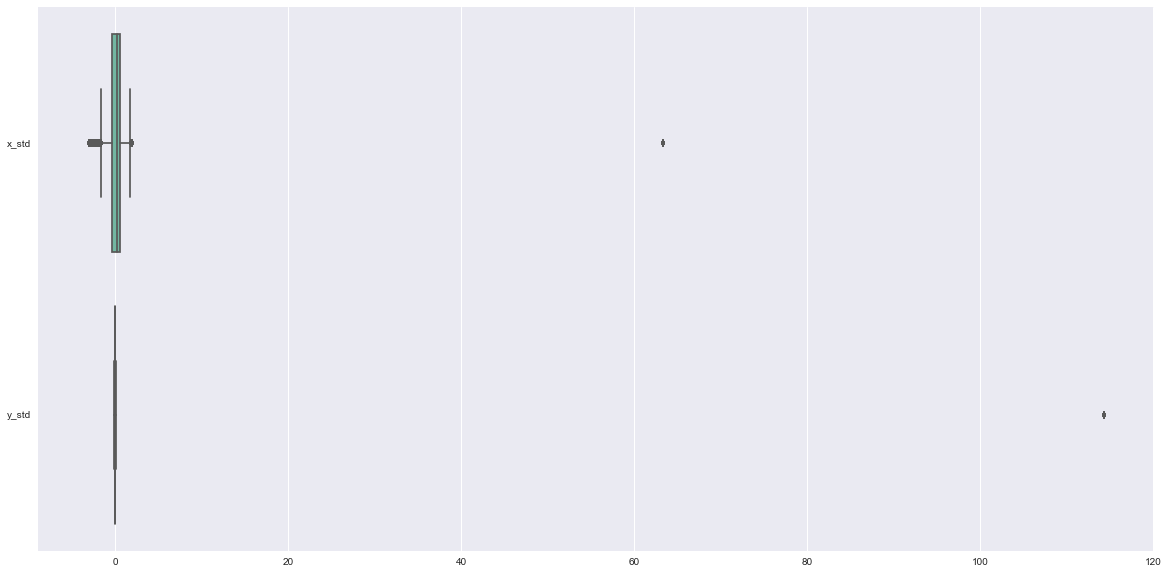

In [17]:
# Visualize cont. data
fig, ax = plt.subplots(nrows = 1
                     ,ncols = 1
                     ,figsize = (20, 10))

sns.boxplot(data=df_sf_crime2[['x_std', 'y_std']], orient="h", palette="Set2")
plt.show()

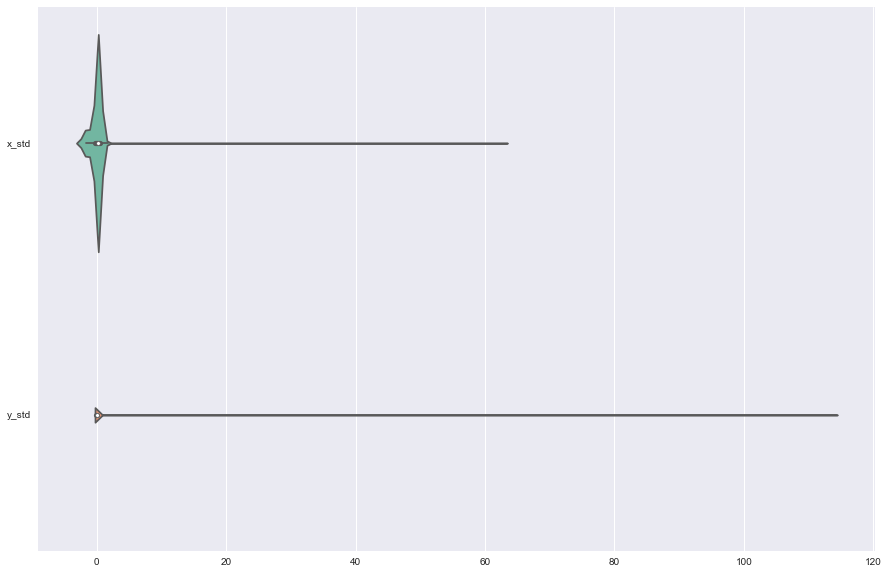

In [18]:
# Visualize
fig, ax = plt.subplots(nrows = 1
                     ,ncols = 1
                     ,figsize = (15, 10))

sns.violinplot(data=df_sf_crime2[['x_std', 'y_std']], orient="h", palette="Set2")
plt.show()

In [19]:
#---------------------------------------- 
# Create flags for finding outliers
#---------------------------------------- 
df_sf_crime2['f_outl_x'] = np.where(df_sf_crime2['x_std'] > 60
                                   ,1
                                   ,0)

df_sf_crime2['f_outl_y'] = np.where(df_sf_crime2['y_std'] > 100
                                   ,1
                                   ,0)

In [20]:
#---------------------------------------- 
# list holders column types 
#---------------------------------------- 
list_hld_obj_col = ['category', 'descript', 'dayofweek', 'pddistrict', 'resolution', 'address'] \
+ [dt for dt in df_sf_crime2.columns if dt.find('dates_') >= 0] \
+ [flag for flag in df_sf_crime2.columns if flag.find("f_") >= 0] \
+ [grp for grp in df_sf_crime2.columns if grp.find("grp_") >= 0 and grp != 'grp_dates_hour']
list_hld_cont_col = ['x','y','x_std','y_std']
list_hld_rest_col = ['dates']

In [21]:
print ("Categorical: \n{}".format(list_hld_obj_col))
print ("Continious: \n{}".format(list_hld_cont_col))
print ("Other: \n{}".format(list_hld_rest_col))

Categorical: 
['category', 'descript', 'dayofweek', 'pddistrict', 'resolution', 'address', 'dates_day_wk', 'dates_hour', 'dates_mth', 'dates_qtr', 'dates_yr', 'grp_dates_hour', 'f_not_resolved', 'f_outl_x', 'f_outl_y', 'grp_x_sign', 'grp_y', 'grp_resolv_hml', 'grp_geo_zone_hml']
Continious: 
['x', 'y', 'x_std', 'y_std']
Other: 
['dates']


### Distinct levels in categorical variables

In [22]:
# Holder
list_hld_col_cnt = list()

# Work through all columns
for idx_cat_col, cat_col in enumerate(list_hld_obj_col):
    # Append to holder, and get 
    list_hld_col_cnt.append([cat_col
                             ,len(set(df_sf_crime2[cat_col].values))]
                           )
    
# Create DataFrame to hold output
df_count_cat_col = pd.DataFrame(list_hld_col_cnt, columns = ['column', 'count']).sort_values(by = 'count').reset_index(drop = True)

# List for holding categorical objets
booln_col_cat = (~df_count_cat_col['column'].isin(['f_outl_x', 'f_outl_y'])) & (df_count_cat_col['count'] <= 15)
list_col_cat_lt_15 = list(zip(df_count_cat_col[booln_col_cat]['column'].tolist()
                              ,df_count_cat_col[booln_col_cat]['count'].tolist()
                             )
                         )
print ("Categorical columns for visualization is: \n{}".format(list_col_cat_lt_15))

Categorical columns for visualization is: 
[('f_not_resolved', 2), ('grp_resolv_hml', 3), ('dates_qtr', 4), ('grp_geo_zone_hml', 4), ('grp_dates_hour', 5), ('dates_day_wk', 7), ('dayofweek', 7), ('grp_x_sign', 9), ('pddistrict', 10), ('grp_y', 11), ('dates_mth', 12), ('dates_yr', 13)]


In [23]:
df_count_cat_col

column  count
0           f_outl_y      2
1           f_outl_x      2
2     f_not_resolved      2
3     grp_resolv_hml      3
4          dates_qtr      4
5   grp_geo_zone_hml      4
6     grp_dates_hour      5
7       dates_day_wk      7
8          dayofweek      7
9         grp_x_sign      9
10        pddistrict     10
11             grp_y     11
12         dates_mth     12
13          dates_yr     13
14        resolution     17
15        dates_hour     24
16          category     39
17          descript    879
18           address  23228

In [24]:
# Values in categorical variables, with not to many levels, and not dates
list_col_obj_temp = df_count_cat_col[(df_count_cat_col['count'] < 40) & (df_count_cat_col['column'].str.find("dates") < 0) & (df_count_cat_col['column'].str.find('f_out') < 0)].column.values.tolist()
list_col_obj_temp_oth = df_count_cat_col[(df_count_cat_col['count'] >= 40) & (df_count_cat_col['column'].str.find("dates") < 0) & (df_count_cat_col['column'].str.find('f_out') < 0)].column.values.tolist()

for idx_col_cat, cat_col in enumerate(list_col_obj_temp):
    print ("\nColumn is: {}. Distinct levels are: {}. Values are: \n{}".format(cat_col
                                                                             ,df_count_cat_col[df_count_cat_col['column'] == cat_col]['count'].values[0]
                                                                             ,set(df_sf_crime2[cat_col].values)
                                                                            )
          )

print ("\nOther columns are: {}".format(list_col_obj_temp_oth))


Column is: f_not_resolved. Distinct levels are: 2. Values are: 
{0, 1}

Column is: grp_resolv_hml. Distinct levels are: 3. Values are: 
{'grp_resolv_% > 70%', '20% < grp_resolv_% <= 70%', 'grp_resolv_% <= 20%'}

Column is: grp_geo_zone_hml. Distinct levels are: 4. Values are: 
{'grp_geo_high', 'Other zone', 'grp_geo_low', 'grp_geo_med'}

Column is: dayofweek. Distinct levels are: 7. Values are: 
{'Sunday', 'Tuesday', 'Monday', 'Saturday', 'Friday', 'Wednesday', 'Thursday'}

Column is: grp_x_sign. Distinct levels are: 9. Values are: 
{'122.44 < x_sign <= 122.46', '122.38 < x_sign <= 122.4', '122.42 < x_sign <= 122.44', '122.5 > x_sign', '120.5 <= x_sign', '122.46 < x_sign <= 122.48', '122.4 < x_sign <= 122.42', '122.48 < x_sign <= 122.5', '122.36 < x_sign <= 122.38'}

Column is: pddistrict. Distinct levels are: 10. Values are: 
{'PARK', 'MISSION', 'NORTHERN', 'CENTRAL', 'RICHMOND', 'TENDERLOIN', 'INGLESIDE', 'SOUTHERN', 'TARAVAL', 'BAYVIEW'}

Column is: grp_y. Distinct levels are: 11. 

In [25]:
grp_by_addrs = df_sf_crime2[['address', 'dates']].groupby(['address'], as_index = False).count().rename(columns = {'dates' : 'n_rows'}).sort_values(by = 'n_rows', ascending = False)

grp_by_addrs['%_of_tot'] = grp_by_addrs.n_rows.div(grp_by_addrs.n_rows.sum(axis = 0))
grp_by_addrs['n_rep_addr'] = grp_by_addrs['n_rows'].astype('str').str.len()


---
## Visualization
---

### Geological placement

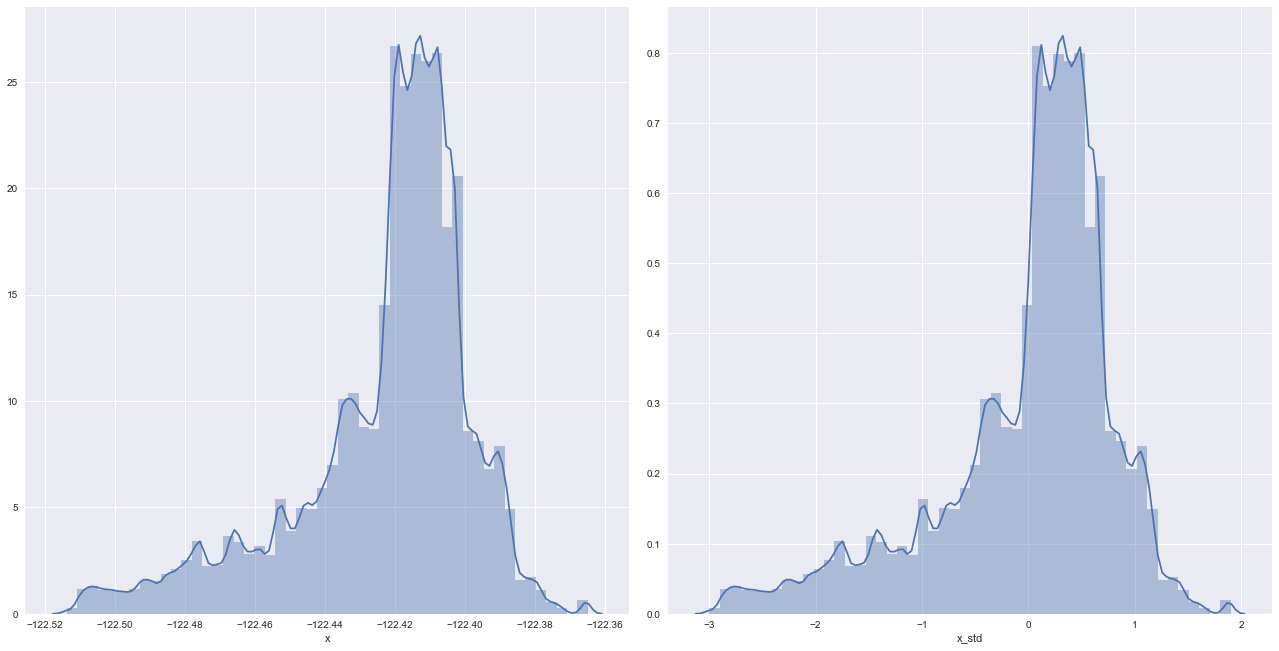

In [26]:
# Create figure object
fig, ax = plt.subplots(nrows = 1
                      ,ncols = 2
                      ,figsize = (18, 9)
                       )


fig.tight_layout()

for idx_ax, ax_col in enumerate(['x', 'x_std']):
    sns.distplot(df_sf_crime2[df_sf_crime2.f_outl_x != 1][ax_col], kde = True, ax = ax[idx_ax])

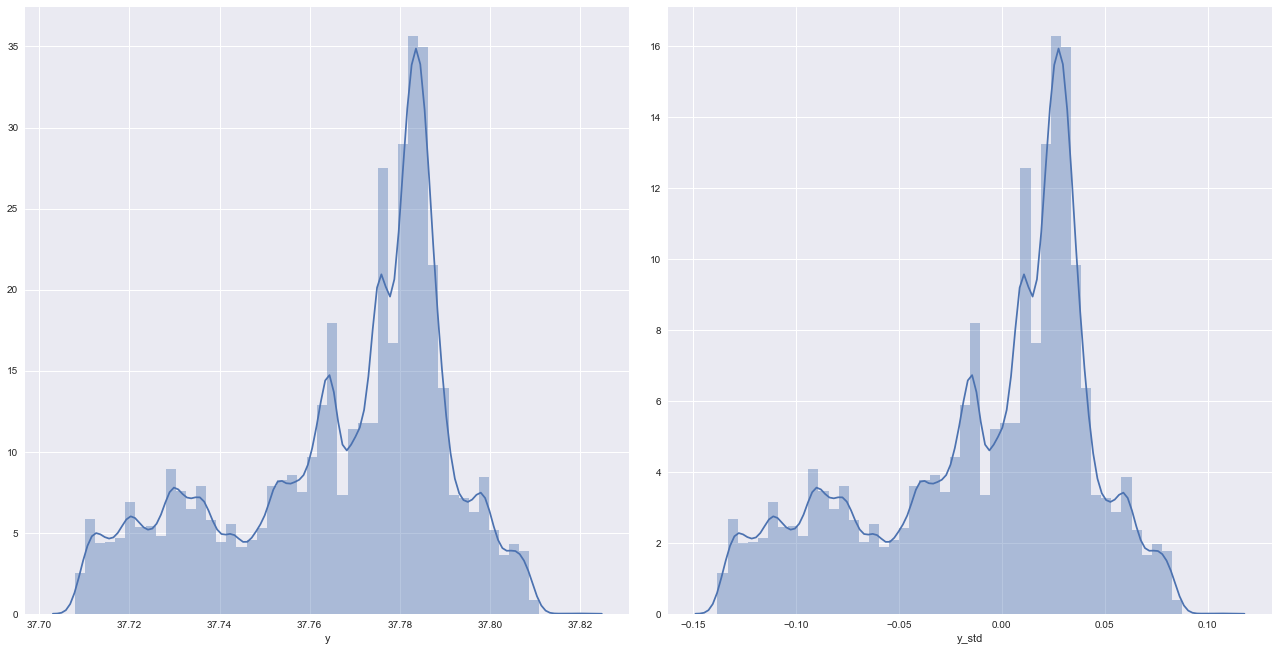

In [27]:
# Create figure object
fig, ax = plt.subplots(nrows = 1
                      ,ncols = 2
                      ,figsize = (18, 9)
                       )


fig.tight_layout()

for idx_ax, ax_col in enumerate(['y', 'y_std']):
    sns.distplot(df_sf_crime2[df_sf_crime2.f_outl_x != 1][ax_col], kde = True, ax = ax[idx_ax])

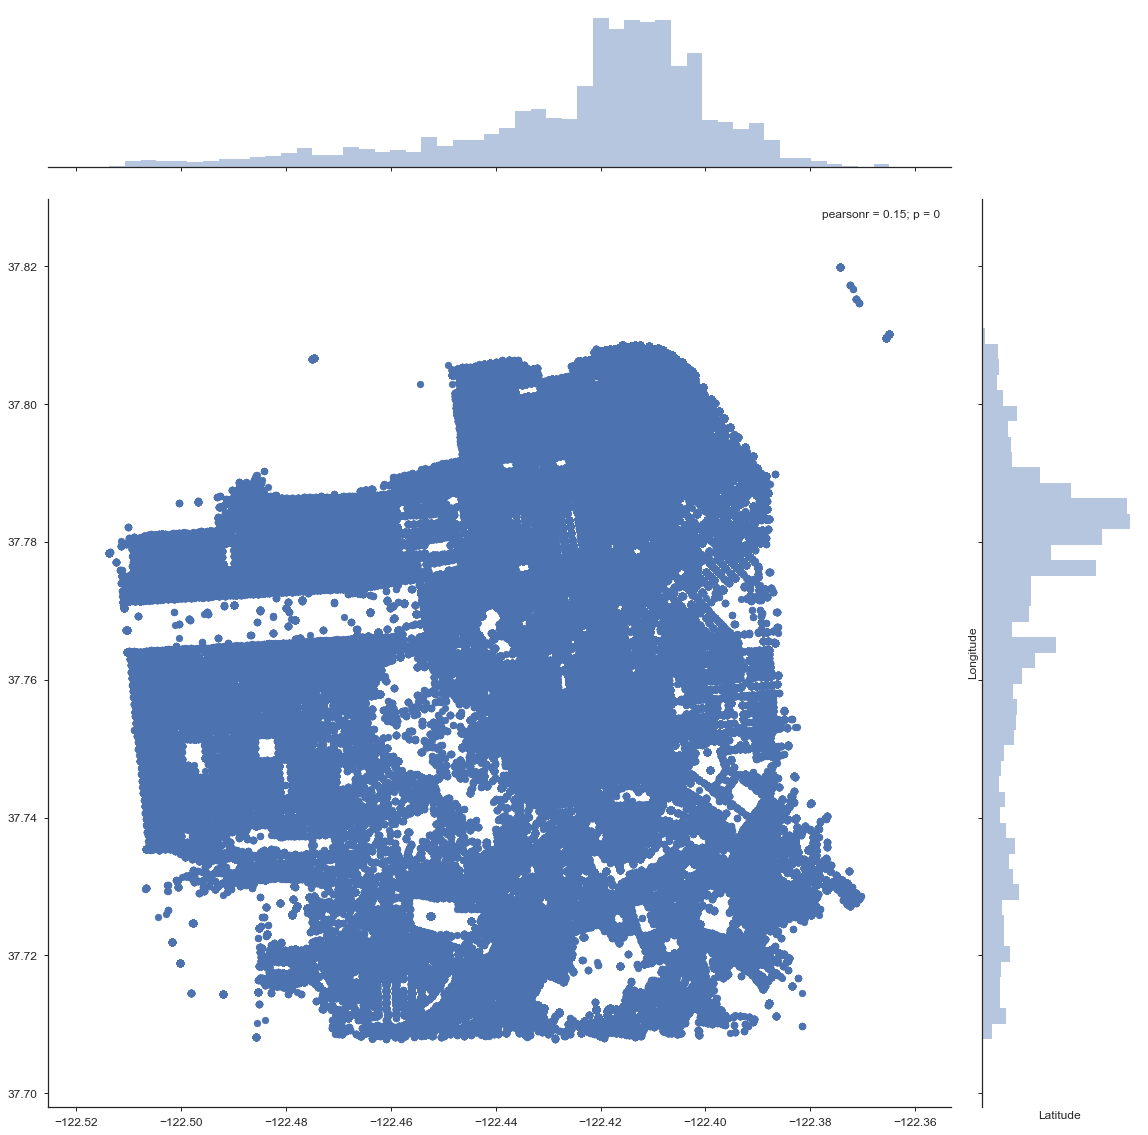

In [80]:
# Create figure object
sns.jointplot(x=df_sf_crime2[df_sf_crime2.f_outl_x == 0].x.values, y=df_sf_crime2[df_sf_crime2.f_outl_y == 0].y.values, size=16)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

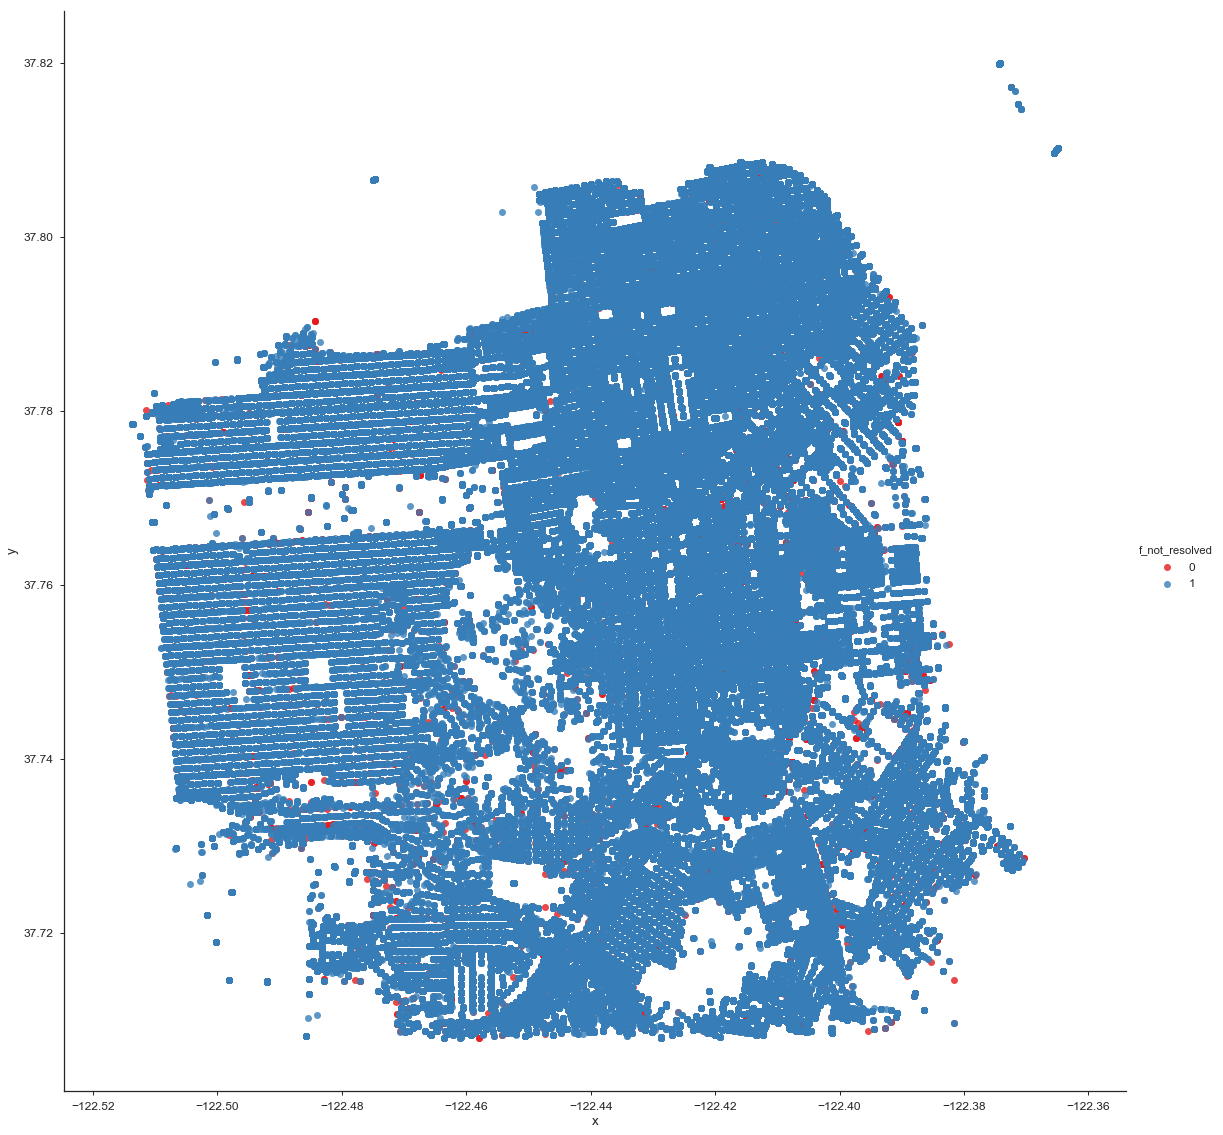

In [79]:
boolean_outl_none = df_sf_crime2[[outl for outl in df_sf_crime2.columns if outl.find("f_out") >= 0]].isin([0]).all(axis = 1)

sns.lmplot(x='x', y='y', hue='f_not_resolved', data=df_sf_crime2[boolean_outl_none], fit_reg=False, size=16, palette='Set1')

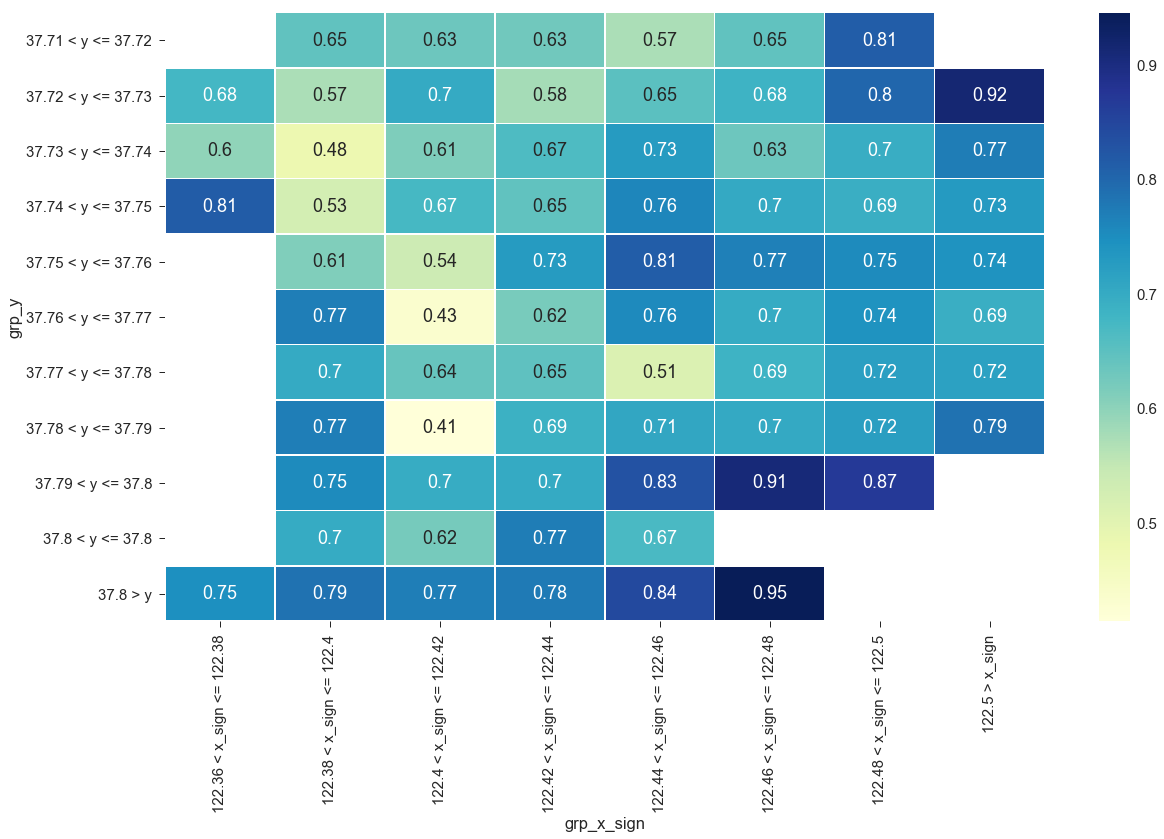

In [94]:
# Object to hold plotss
fig, ax = plt.subplots(nrows = 1
                      ,ncols = 1
                      ,figsize = (18, 12)
                     
                      )

sns.set(font_scale=1.5)

# Heatmap of years vs. quarters
pivot_xy = pd.pivot_table(df_sf_crime2[boolean_outl_none], values = 'f_not_resolved', index='grp_y', columns='grp_x_sign', aggfunc='mean')


# Heatmap of years vs. months
ax = sns.heatmap(pivot_xy, annot=True,linewidths=.5,  cmap="YlGnBu")

sns.set_style("ticks",{"xtick.major.size":6,
"ytick.major.size":6})

fig.tight_layout()


plt.show()

### Dates

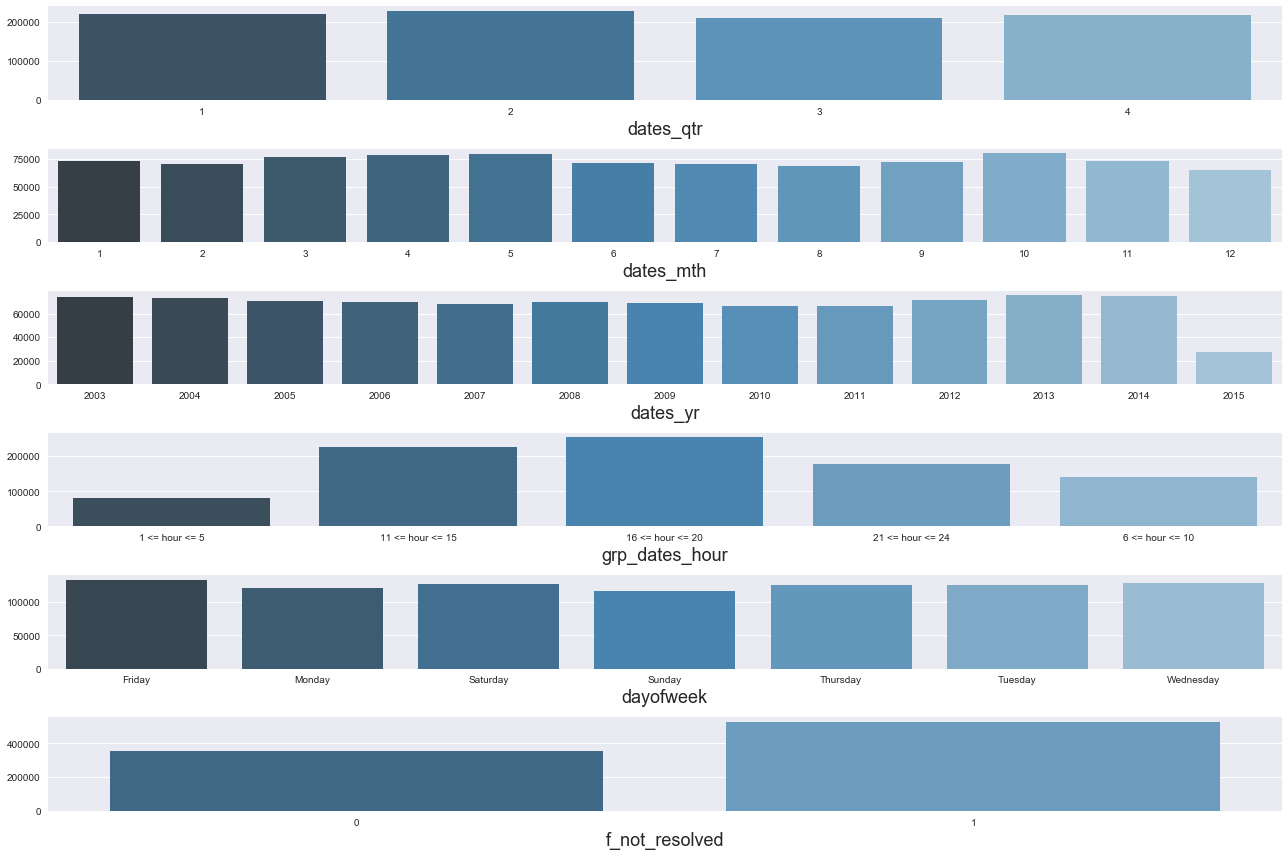

In [28]:
list_hld_time_cat = ['dates_qtr', 'dates_mth', 'dates_yr', 'grp_dates_hour', 'dayofweek', 'f_not_resolved']

# Object to hold plotss
fig, ax = plt.subplots(nrows = len(list_hld_time_cat)
                      ,ncols = 1
                      ,figsize = (18, 12)

                      )


# Loop over  grps
for idx_time_cat, time_col in enumerate(list_hld_time_cat):

    # In-data
    _tmp_grp = df_sf_crime2[['dates', time_col]].groupby([time_col], as_index = False).count()
    
    # Plot object
    plot_out = sns.barplot(_tmp_grp[time_col]
                            ,_tmp_grp['dates']
                           ,palette = 'Blues_d'
                           ,ax = ax[idx_time_cat]
                          )


    # plt.xlabel('Quarter', fontsize=18, rotation = 0)
    # plt.ylabel('N reports', fontsize=18, rotation = 90)
    # plt.xticks(fontsize=18, rotation=0)
    # plt.yticks(fontsize=18, rotation=0)

    # ax[0].xlabel('Quarter', fontsize=18, rotation = 0)
    # ax[0].ylabel('N reports', fontsize=18, rotation = 90)
    
    
    ax[idx_time_cat].set_xlabel(time_col,fontsize=18, rotation=0)
    ax[idx_time_cat].set_ylabel('',fontsize=18, rotation=0)    


# Make sure we get space betweens plots
fig.tight_layout()


plt.show()

    


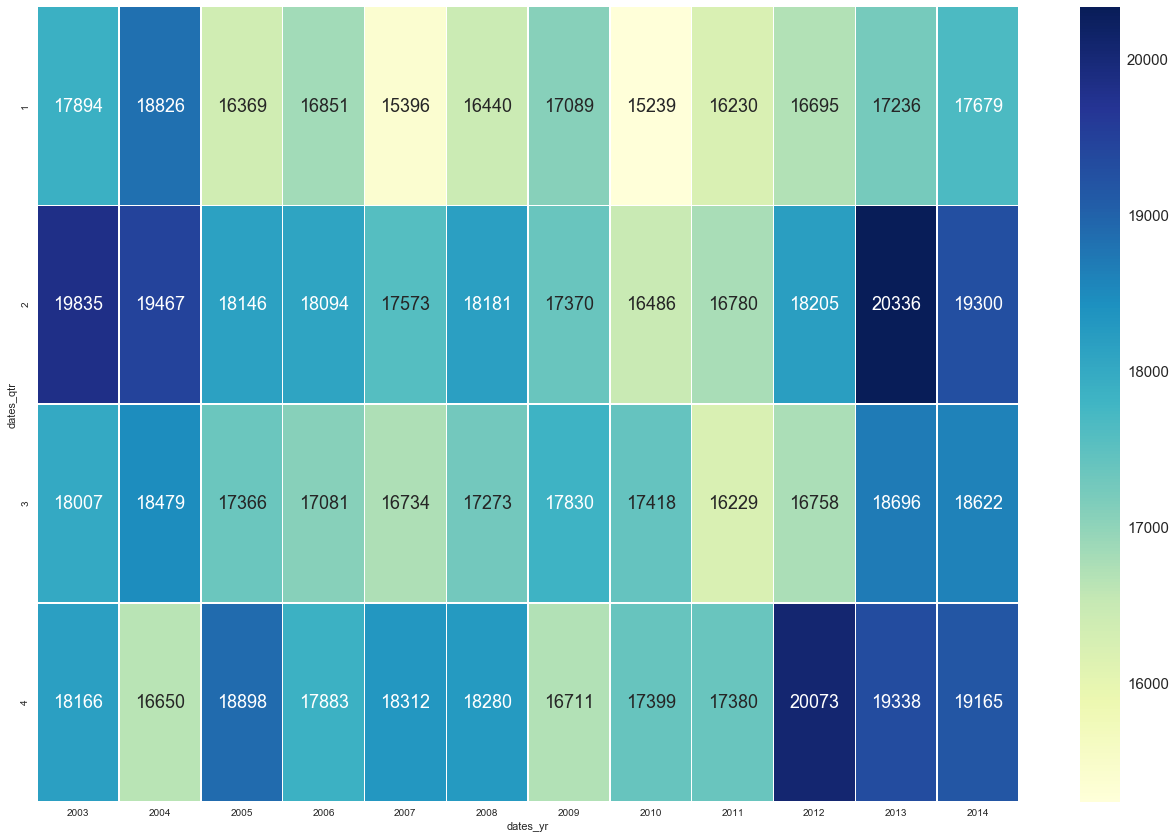

In [29]:
# Object to hold plotss
fig, ax = plt.subplots(nrows = 1
                      ,ncols = 1
                      ,figsize = (18, 12)
                     
                      )

sns.set(font_scale=1.5)

# Heatmap of years vs. quarters
pivot_1 = pd.pivot_table(df_sf_crime2[df_sf_crime2['dates_yr'] != 2015], values = 'dates', index='dates_qtr', columns='dates_yr', aggfunc='count')

# Heatmap of years vs. months
ax = sns.heatmap(pivot_1, annot=True,linewidths=.5, fmt="d", cmap="YlGnBu")

sns.set_style("ticks",{"xtick.major.size":6,
"ytick.major.size":6})

fig.tight_layout()


plt.show()

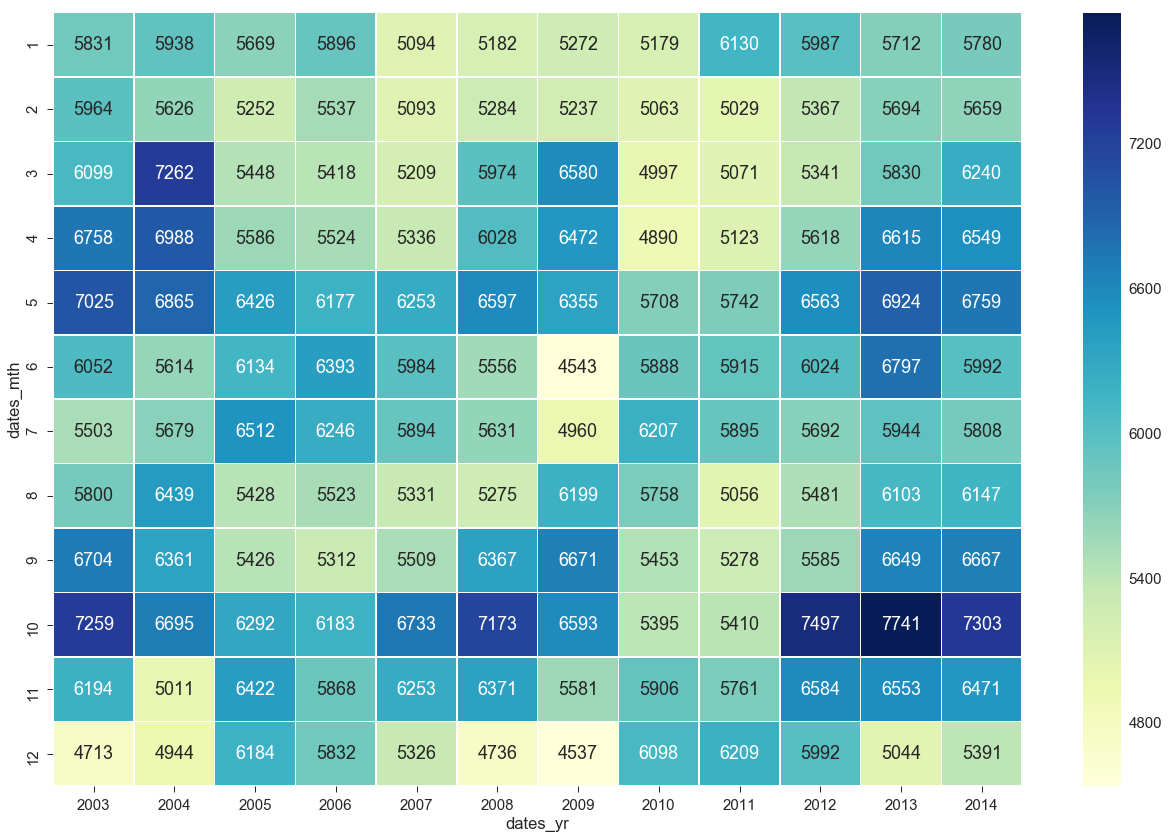

In [30]:
# Object to hold plotss
fig, ax = plt.subplots(nrows = 1
                      ,ncols = 1
                      ,figsize = (18, 12)
                     
                      )

sns.set(font_scale=1.5)

# Heatmap of years vs. quarters
pivot_1 = pd.pivot_table(df_sf_crime2[df_sf_crime2['dates_yr'] != 2015], values = 'dates', index='dates_mth', columns='dates_yr', aggfunc='count')

# Heatmap of years vs. months
ax = sns.heatmap(pivot_1, annot=True,linewidths=.5, fmt="d", cmap="YlGnBu")

sns.set_style("ticks",{"xtick.major.size":6,
"ytick.major.size":6})

fig.tight_layout()


plt.show()

In [31]:
list_col_cat_lt_15

[('f_not_resolved', 2),
 ('grp_resolv_hml', 3),
 ('dates_qtr', 4),
 ('grp_geo_zone_hml', 4),
 ('grp_dates_hour', 5),
 ('dates_day_wk', 7),
 ('dayofweek', 7),
 ('grp_x_sign', 9),
 ('pddistrict', 10),
 ('grp_y', 11),
 ('dates_mth', 12),
 ('dates_yr', 13)]

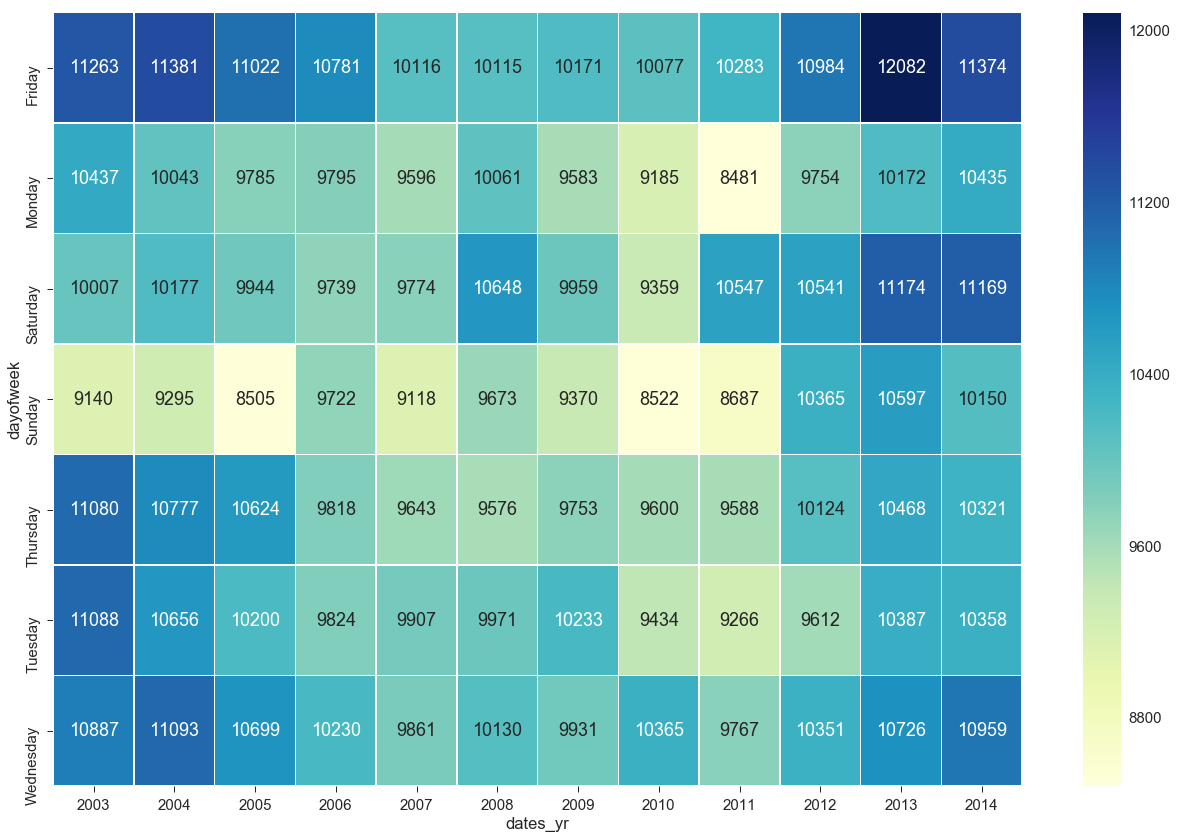

In [32]:
# Object to hold plotss
fig, ax = plt.subplots(nrows = 1
                      ,ncols = 1
                      ,figsize = (18, 12)
                     
                      )

sns.set(font_scale=1.5)

# Heatmap of years vs. quarters
pivot_1 = pd.pivot_table(df_sf_crime2[df_sf_crime2['dates_yr'] != 2015], values = 'dates', index='dayofweek', columns='dates_yr', aggfunc='count')

# Heatmap of years vs. months
ax = sns.heatmap(pivot_1, annot=True,linewidths=.5, fmt="d", cmap="YlGnBu")

sns.set_style("ticks",{"xtick.major.size":6,
"ytick.major.size":6})

fig.tight_layout()


plt.show()

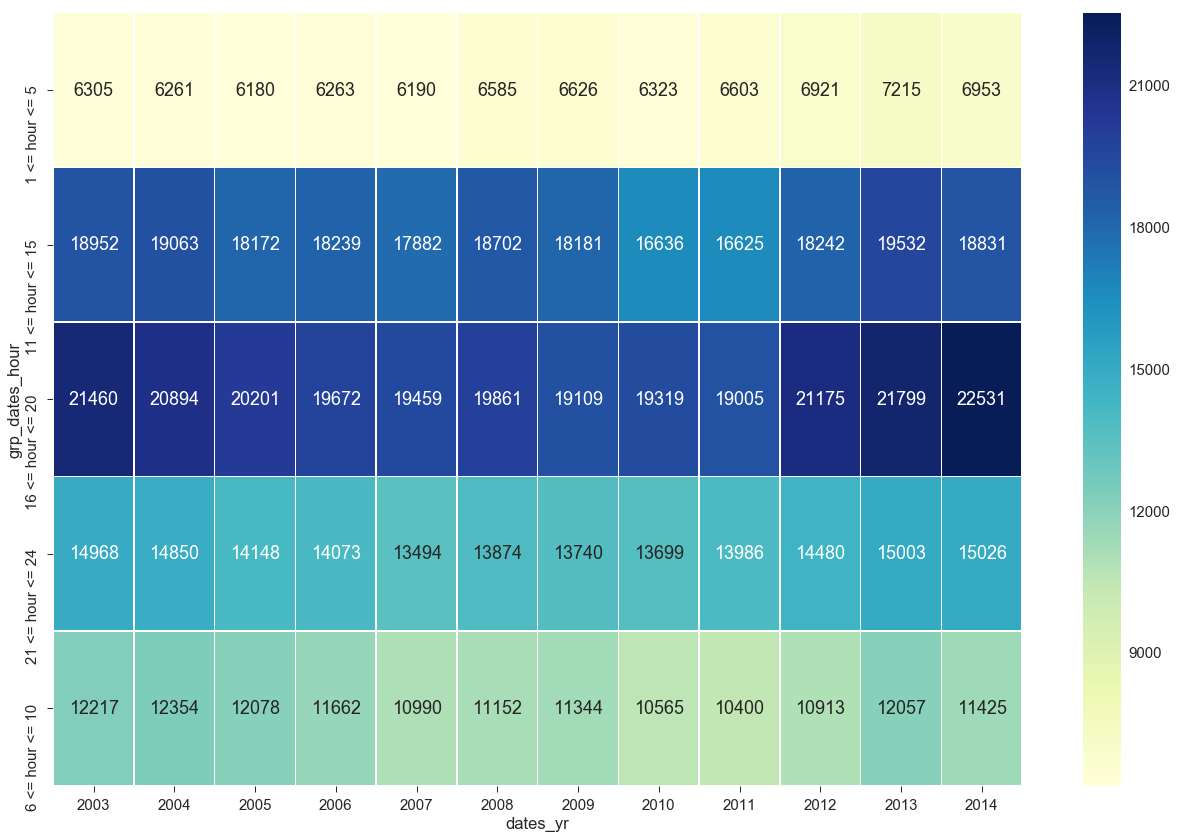

In [33]:
# Object to hold plotss
fig, ax = plt.subplots(nrows = 1
                      ,ncols = 1
                      ,figsize = (18, 12)
                     
                      )

sns.set(font_scale=1.5)

# Heatmap of years vs. quarters
pivot_1 = pd.pivot_table(df_sf_crime2[df_sf_crime2['dates_yr'] != 2015], values = 'dates', index='grp_dates_hour', columns='dates_yr', aggfunc='count')

# Heatmap of years vs. months
ax = sns.heatmap(pivot_1, annot=True,linewidths=.5, fmt="d", cmap="YlGnBu")

sns.set_style("ticks",{"xtick.major.size":10,
"ytick.major.size":10})

fig.tight_layout()


plt.show()

### Geographical

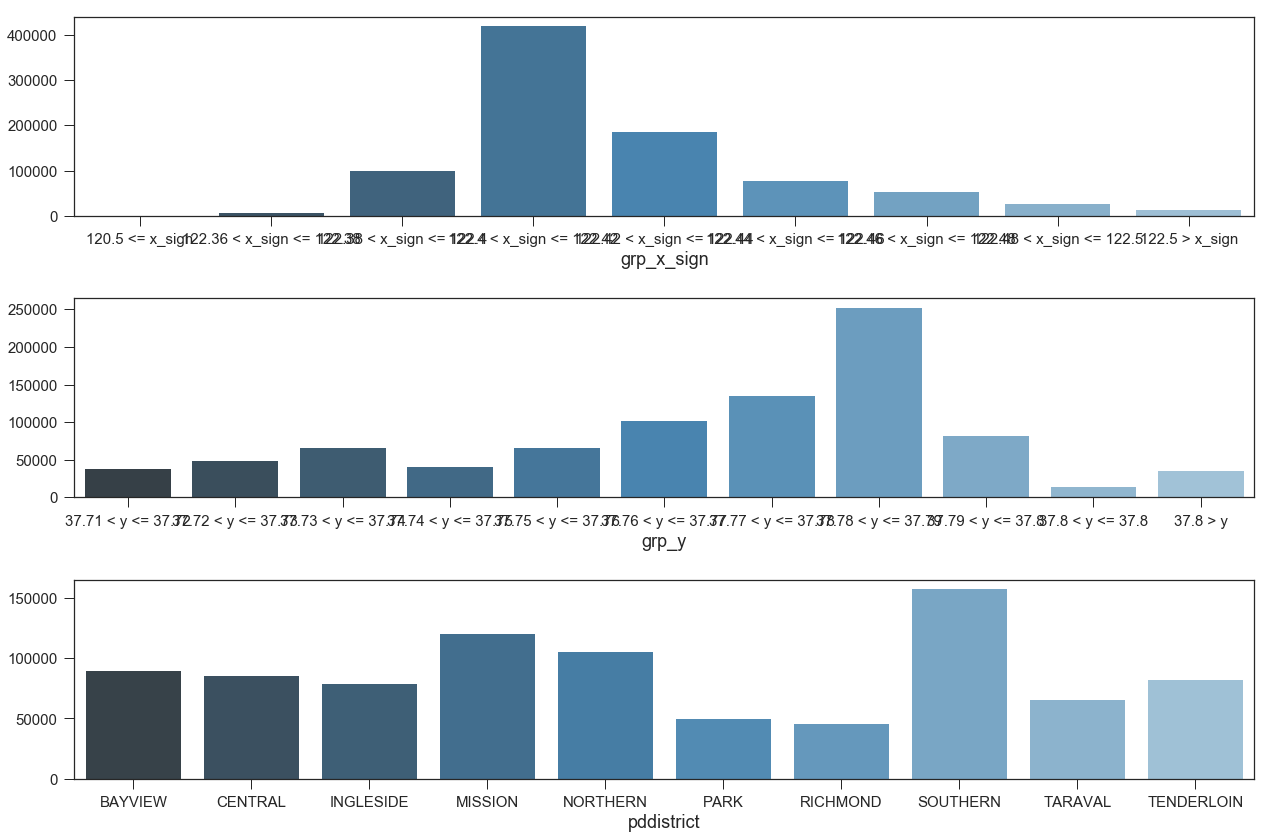

In [34]:
list_hld_cat = ['grp_x_sign', 'grp_y', 'pddistrict']

# Object to hold plotss
fig, ax = plt.subplots(nrows = len(list_hld_cat)
                      ,ncols = 1
                      ,figsize = (18, 12)

                      )

# Loop over  grps
for idx_time_cat, df_col in enumerate(list_hld_cat):

    # In-data
    _tmp_grp = df_sf_crime2[['dates', df_col]].groupby([df_col], as_index = False).count()
    
    # Plot object
    plot_out = sns.barplot(_tmp_grp[df_col]
                            ,_tmp_grp['dates']
                           ,palette = 'Blues_d'
                           ,ax = ax[idx_time_cat]
                          )


    # plt.xlabel('Quarter', fontsize=18, rotation = 0)
    # plt.ylabel('N reports', fontsize=18, rotation = 90)
    # plt.xticks(fontsize=18, rotation=0)
    # plt.yticks(fontsize=18, rotation=0)

    # ax[0].xlabel('Quarter', fontsize=18, rotation = 0)
    # ax[0].ylabel('N reports', fontsize=18, rotation = 90)
    
    
    ax[idx_time_cat].set_xlabel(df_col,fontsize=18, rotation=0)
    ax[idx_time_cat].set_ylabel('',fontsize=18, rotation=0)    


# Make sure we get space betweens plots
fig.tight_layout()


plt.show()

    


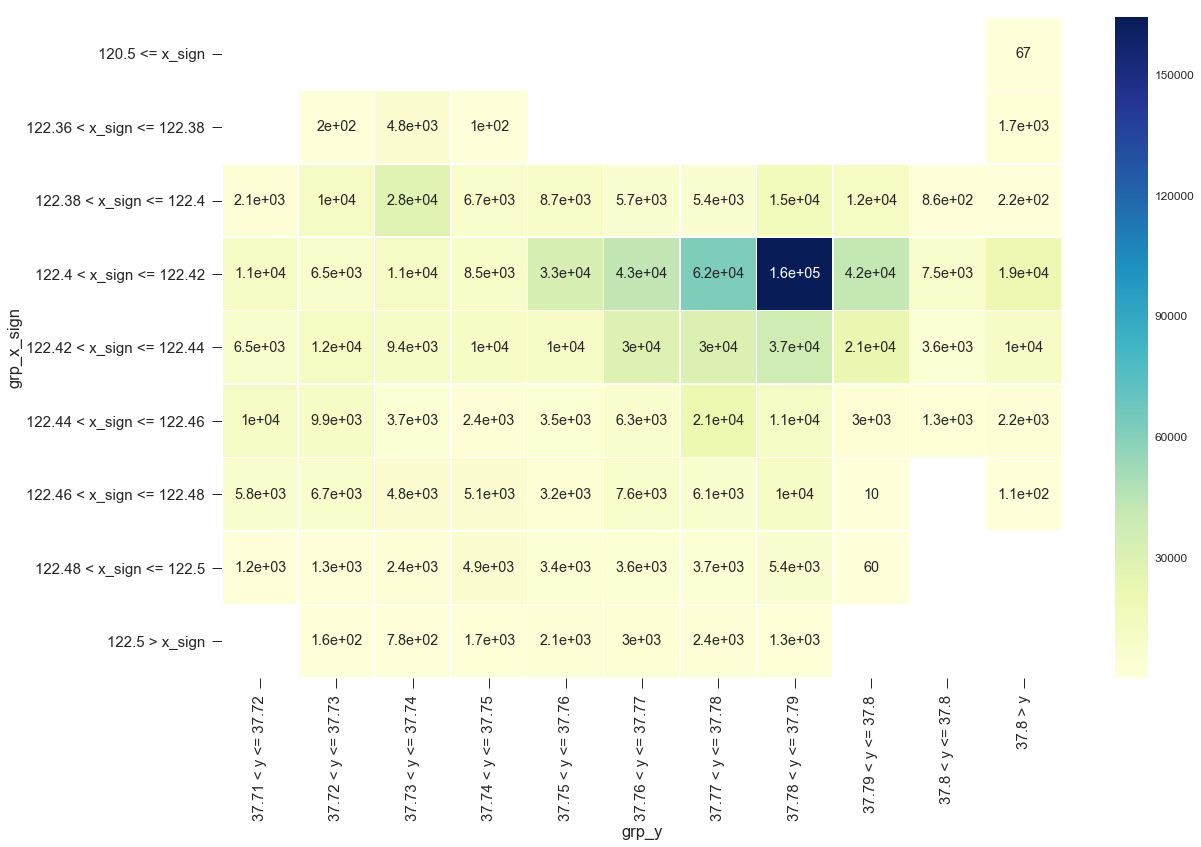

In [35]:
#---------------
# Overall
#---------------

# Object to hold plotss
fig, ax = plt.subplots(nrows = 1
                      ,ncols = 1
                      ,figsize = (18, 12)
                     
                      )

sns.set(font_scale=1.2)

# Heatmap of years vs. quarters
pivot_1 = pd.pivot_table(df_sf_crime2[df_sf_crime2['dates_yr'] != 2015], values = 'dates', index='grp_x_sign', columns='grp_y', aggfunc='count')

# Heatmap of years vs. months
ax = sns.heatmap(pivot_1, annot=True,linewidths=.5,  cmap="YlGnBu")

sns.set_style("ticks"
              ,{"xtick.major.size":4
                ,"ytick.major.size":4})

fig.tight_layout()


plt.show()

List is: 
[2014]

---------------------------------
val_grp_by is: 2014
---------------------------------
Total number of crimes reported: 74766


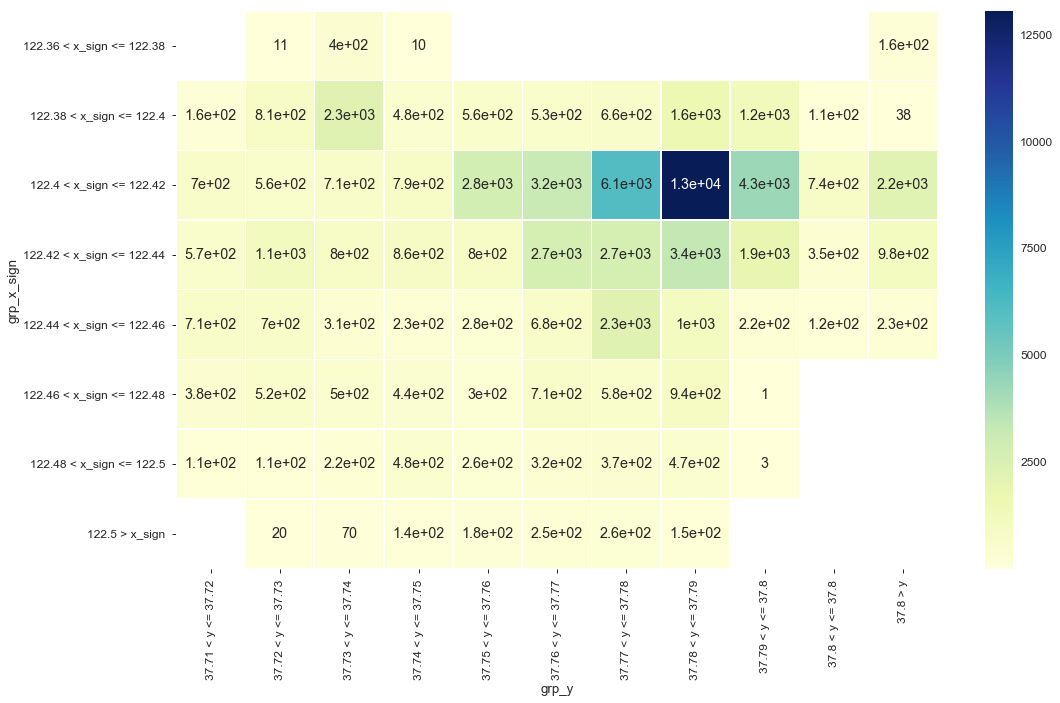

In [36]:
#------------------
# Split by grp_by_var
#------------------
def f_plt_hear(exec_f, n_elem, list_col_sub_elem, grp_by_var ='dates_yr', val_grp_by = None):
    

    if exec_f:
    
        # Give everythig
        if (n_elem == len(list_col_sub_elem)) and (val_grp_by == None):
            list_internal = list_col_sub_elem

        # Subset list
        elif (n_elem != len(list_col_sub_elem)) and (val_grp_by == None):
            list_internal = list_col_sub_elem[0:n_elem]

        # Parameter val_grp_by is not None, take out one specific val_grp_by
        elif val_grp_by:
            list_internal = [yr for yr in list_col_sub_elem if yr == val_grp_by]

        else:
            print ("No val_grp_by....")
    
        print ("List is: \n{}\n".format(list_internal))
    
        # Try and execute
        try:

            for idx_val, val_elem in enumerate(list_internal):


                # Object to hold plotss
                fig, ax = plt.subplots(nrows = 1
                                      ,ncols = 1
                                      ,figsize = (16, 10)
                                      )

                print ("---------------------------------")
                print ("val_grp_by is: {}".format(val_elem))
                print ("---------------------------------")
                print ("Total number of crimes reported: {}".format(len(df_sf_crime2[df_sf_crime2[grp_by_var] == val_elem])))

                sns.set(font_scale=1.2)

                # Heatmap of val_grp_bys vs. quarters
                pivot_1 = pd.pivot_table(df_sf_crime2[(df_sf_crime2['dates_yr'] != 2015) & (df_sf_crime2[grp_by_var] == val_elem)], values = 'dates', index='grp_x_sign', columns='grp_y', aggfunc='count')

                # Heatmap of val_grp_bys vs. months
                ax = sns.heatmap(pivot_1, annot=True,linewidths=.5,  cmap="YlGnBu")

                sns.set_style("ticks"
                              ,{"xtick.major.size":4
                                ,"ytick.major.size":4})

                fig.tight_layout()


                plt.show()

        except:
            print ("Likely something wrong with in-parameter")
                                
    else:
        print ("\nNo execution.....")
               
                                
list_col_sub_elem = list(set(df_sf_crime2[df_sf_crime2['dates_yr'] != 2015]['dates_yr'].values))
                             

f_plt_hear(True, len(list_col_sub_elem), list_col_sub_elem ,grp_by_var ='dates_yr', val_grp_by = 2014)

List is: 
['PARK']

---------------------------------
val_grp_by is: PARK
---------------------------------
Total number of crimes reported: 49313


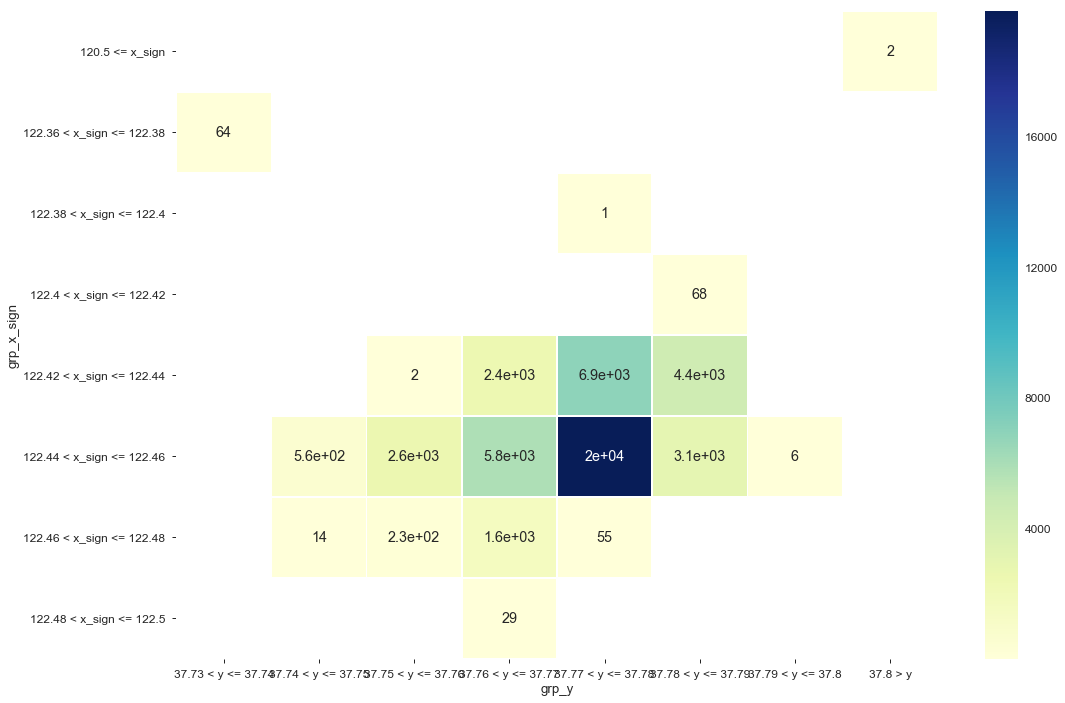

In [37]:
list_col_sub_elem = list(set(df_sf_crime2.pddistrict.values))

f_plt_hear(True, 1, list_col_sub_elem, grp_by_var ='pddistrict', val_grp_by=None)

### Report

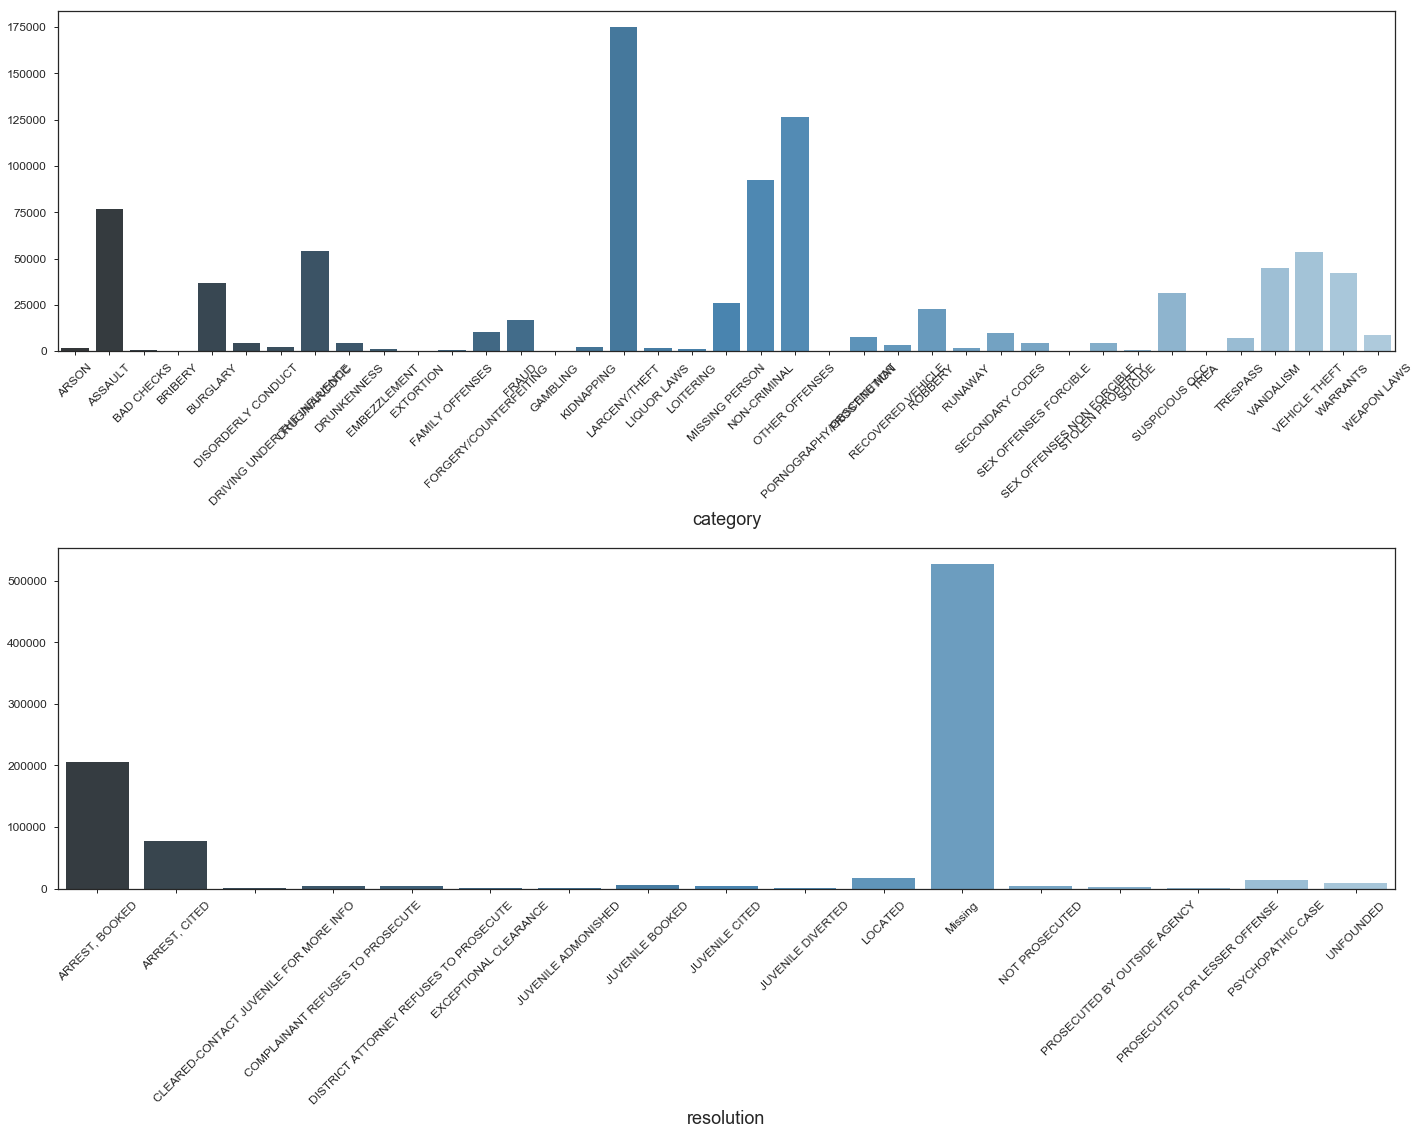

In [38]:
list_hld_cat = ['category', 'resolution']

# Object to hold plotss
fig, ax = plt.subplots(nrows = len(list_hld_cat)
                      ,ncols = 1
                      ,figsize = (20, 16)

                      )

# Loop over  grps
for idx_time_cat, df_col in enumerate(list_hld_cat):

    # In-data
    _tmp_grp = df_sf_crime2[['dates', df_col]].groupby([df_col], as_index = False).count()
    
    # Plot object
    plot_out = sns.barplot(_tmp_grp[df_col]
                            ,_tmp_grp['dates']
                           ,palette = 'Blues_d'
                           ,ax = ax[idx_time_cat]
                          )


    
    ax[idx_time_cat].set_xticklabels(ax[idx_time_cat].get_xticklabels(), rotation=45)    
    
    
    ax[idx_time_cat].set_xlabel(df_col,fontsize=18, rotation=0)
    ax[idx_time_cat].set_ylabel('',fontsize=18, rotation=0)    


# Make sure we get space betweens plots
fig.tight_layout()


plt.show()

-----------------------------------------
Category type is: 
PROSTITUTION
-----------------------------------------


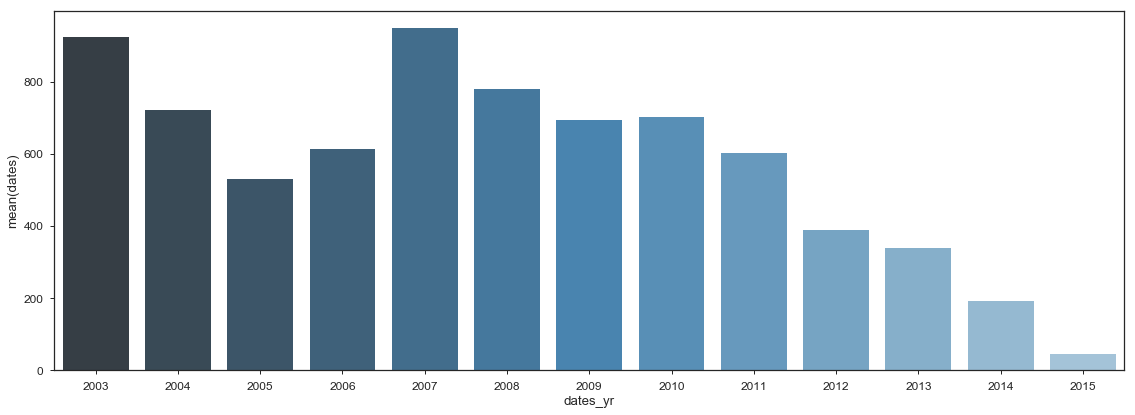

-----------------------------------------
Category type is: 
ARSON
-----------------------------------------


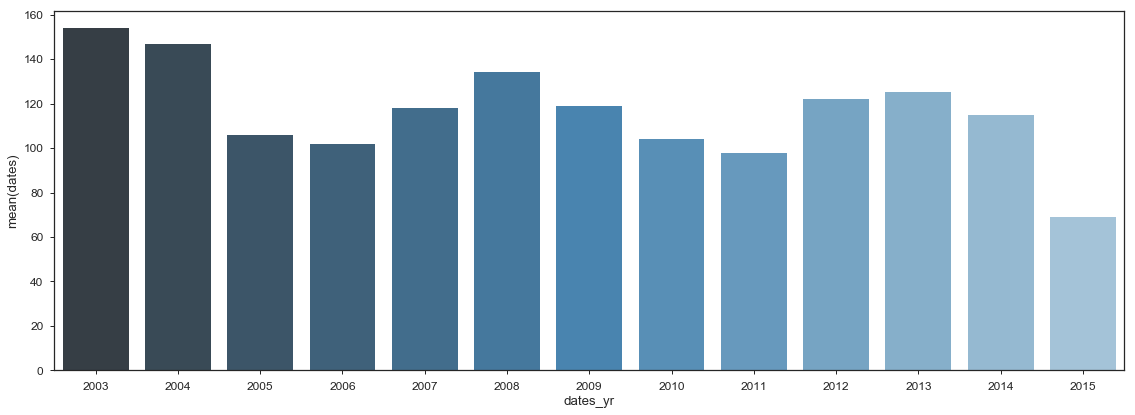

-----------------------------------------
Category type is: 
SEX OFFENSES NON FORCIBLE
-----------------------------------------


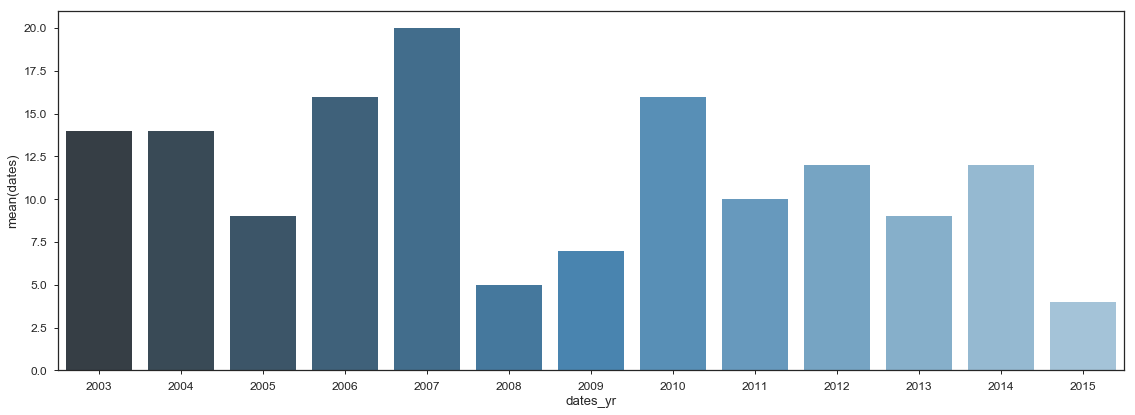

-----------------------------------------
Category type is: 
SEX OFFENSES FORCIBLE
-----------------------------------------


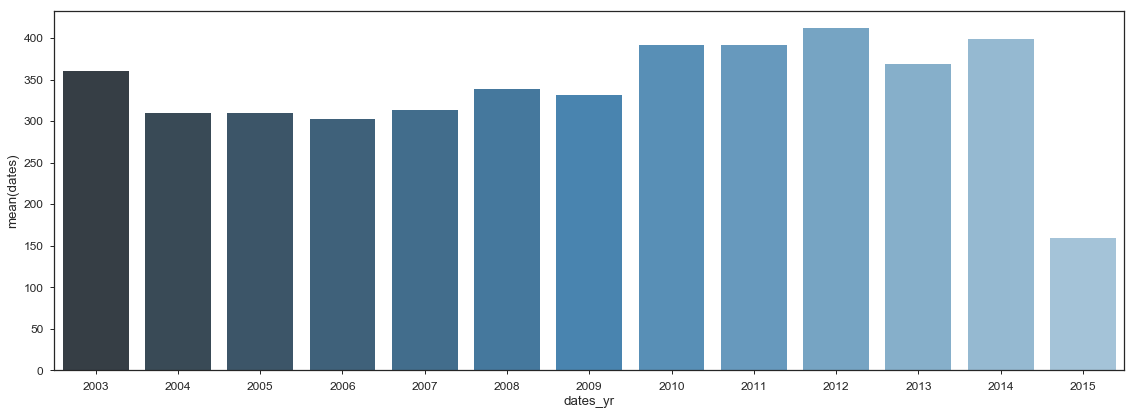

-----------------------------------------
Category type is: 
FAMILY OFFENSES
-----------------------------------------


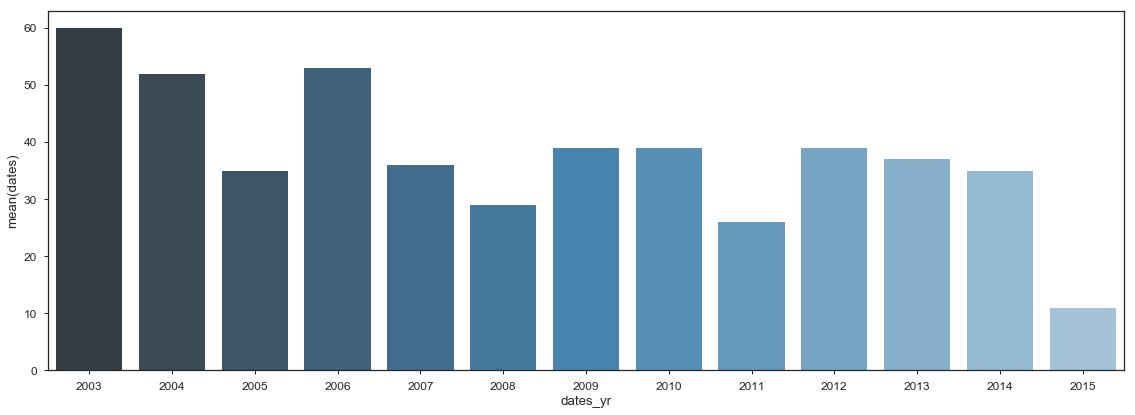

-----------------------------------------
Category type is: 
OTHER OFFENSES
-----------------------------------------


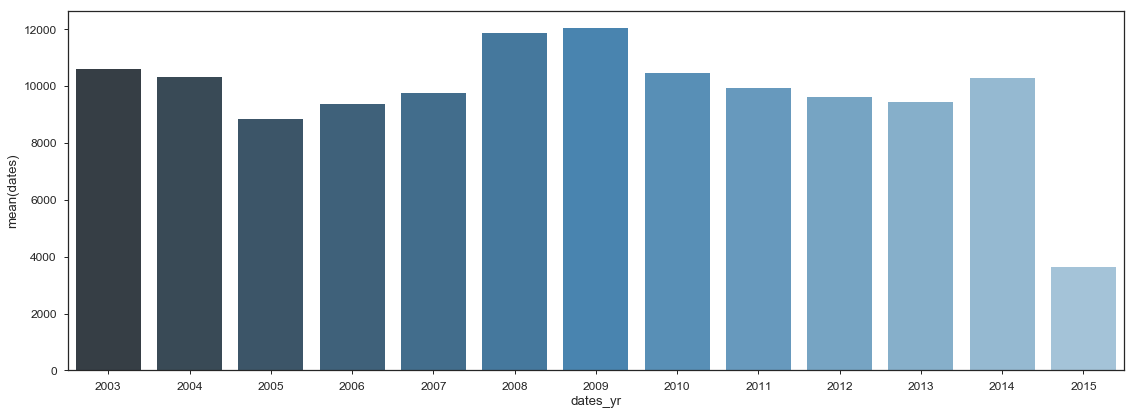

-----------------------------------------
Category type is: 
DISORDERLY CONDUCT
-----------------------------------------


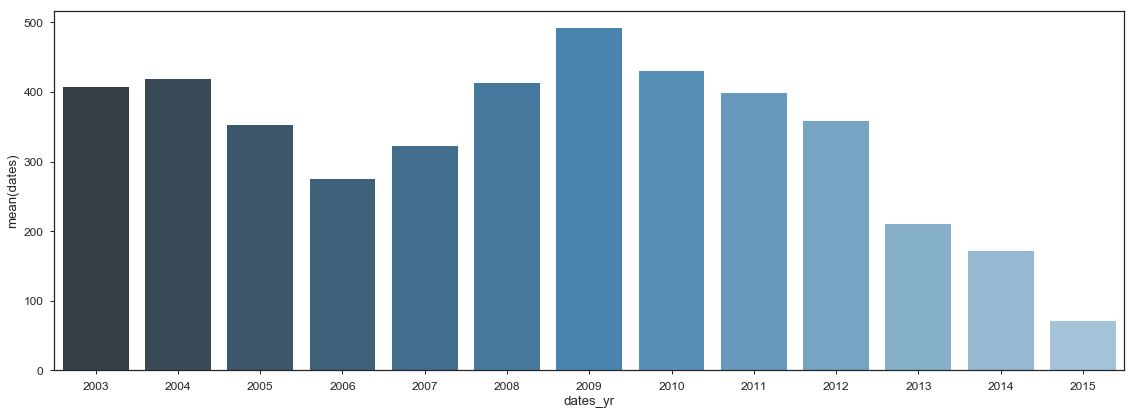

-----------------------------------------
Category type is: 
TRESPASS
-----------------------------------------


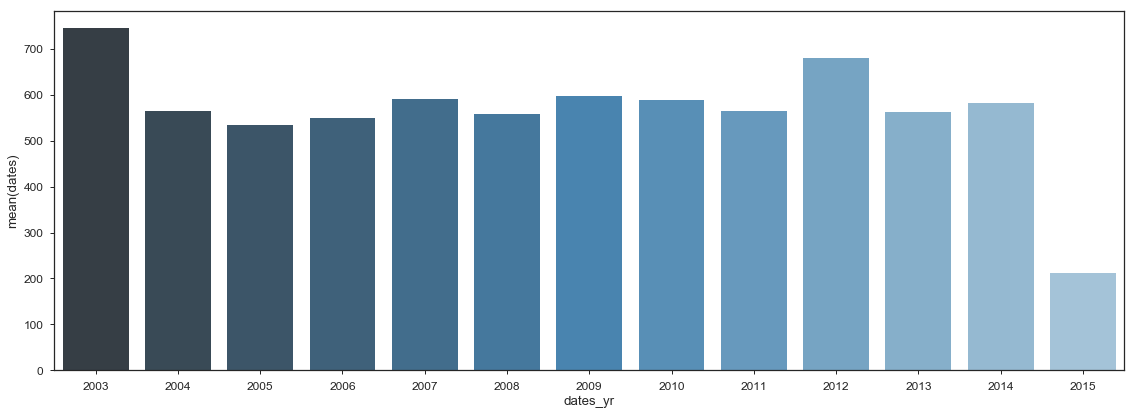

-----------------------------------------
Category type is: 
FORGERY/COUNTERFEITING
-----------------------------------------


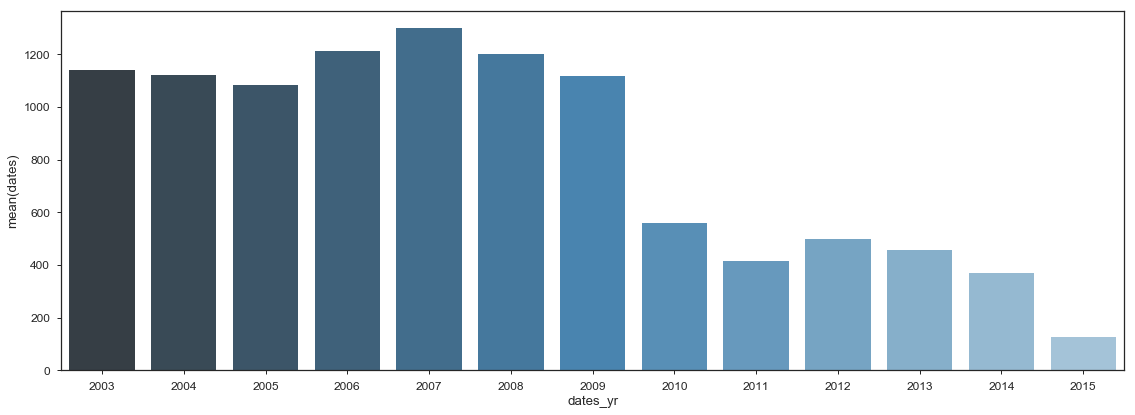

-----------------------------------------
Category type is: 
SUICIDE
-----------------------------------------


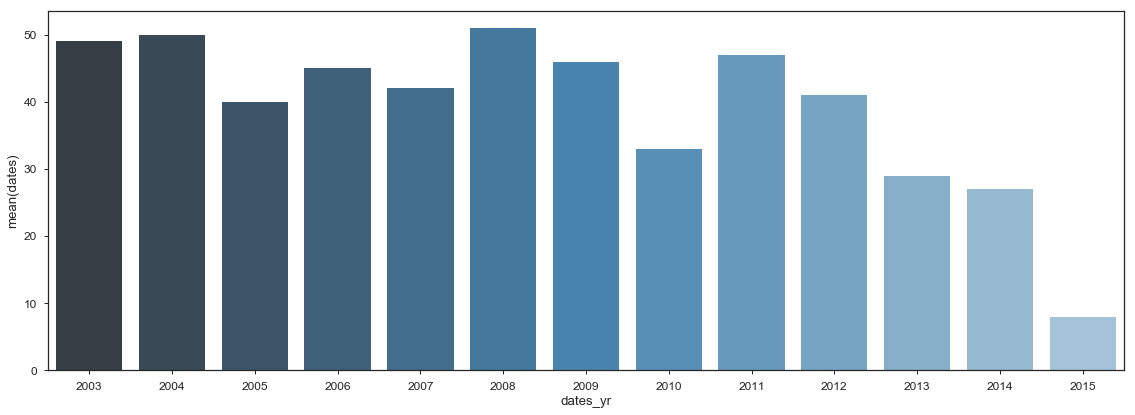

-----------------------------------------
Category type is: 
GAMBLING
-----------------------------------------


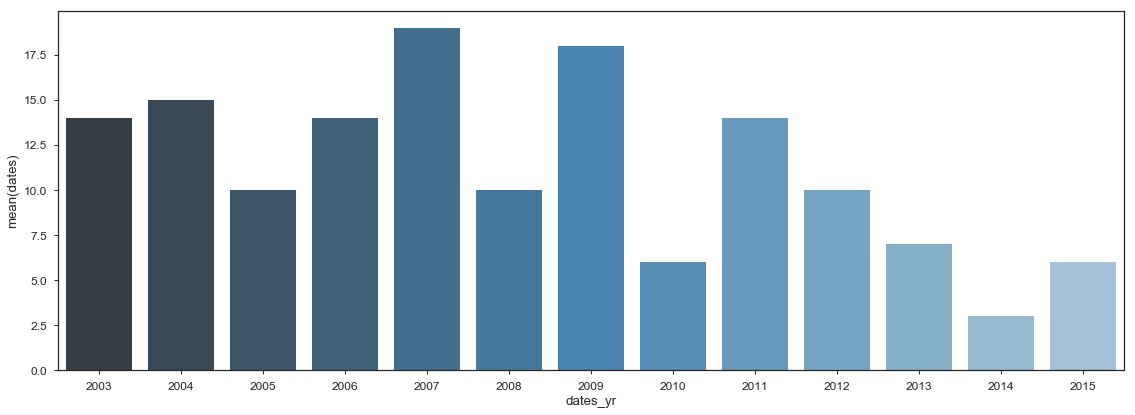

-----------------------------------------
Category type is: 
NON-CRIMINAL
-----------------------------------------


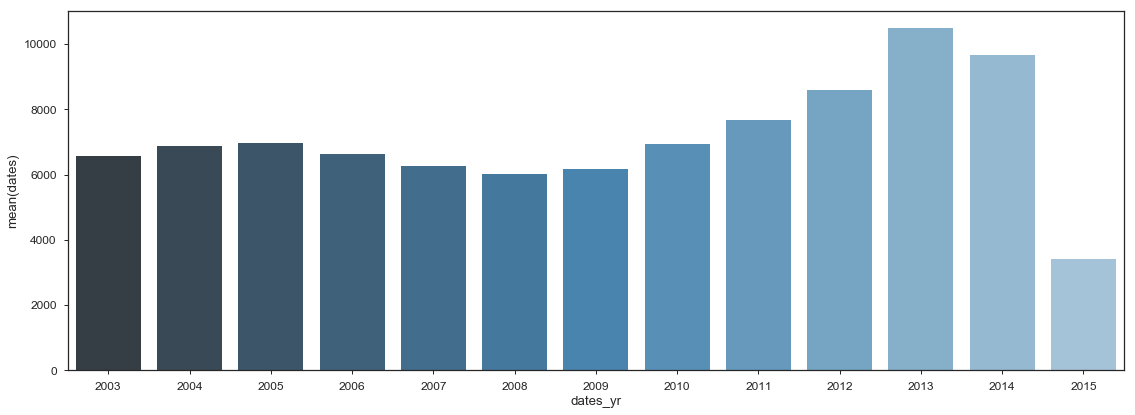

-----------------------------------------
Category type is: 
VANDALISM
-----------------------------------------


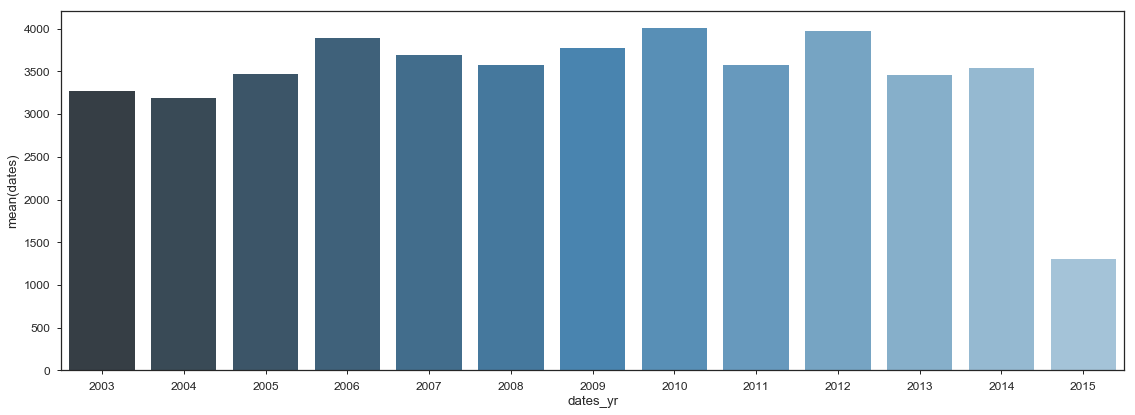

-----------------------------------------
Category type is: 
VEHICLE THEFT
-----------------------------------------


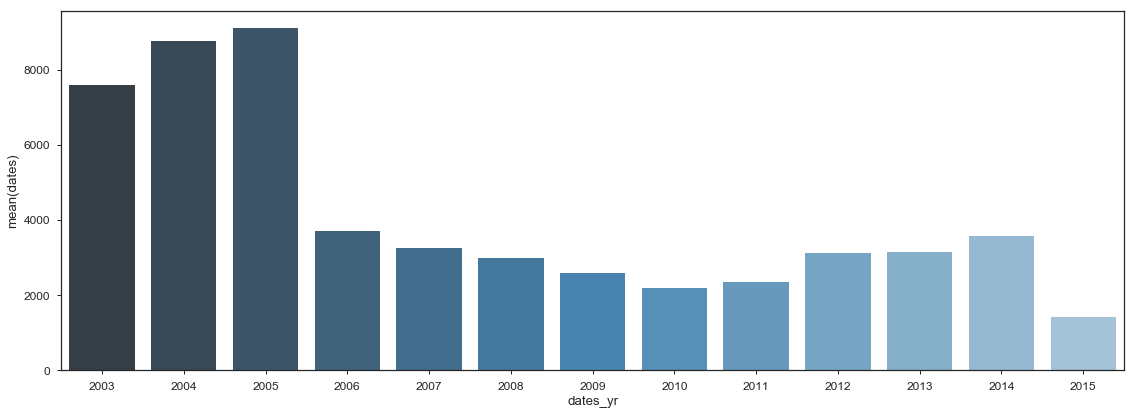

-----------------------------------------
Category type is: 
EMBEZZLEMENT
-----------------------------------------


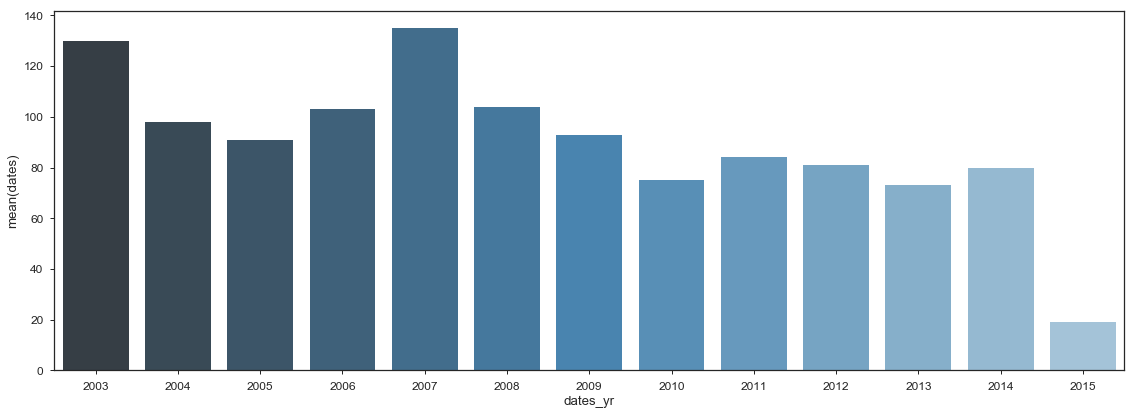

-----------------------------------------
Category type is: 
MISSING PERSON
-----------------------------------------


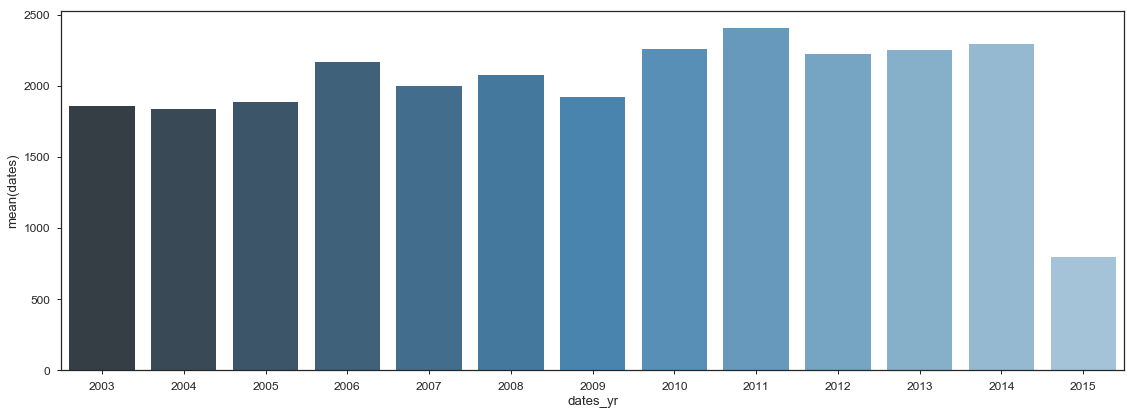

-----------------------------------------
Category type is: 
WEAPON LAWS
-----------------------------------------


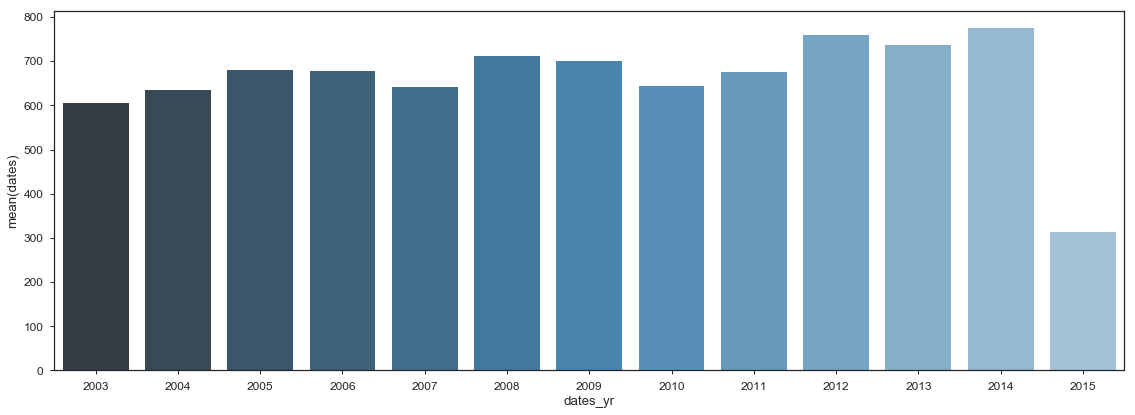

-----------------------------------------
Category type is: 
DRUG/NARCOTIC
-----------------------------------------


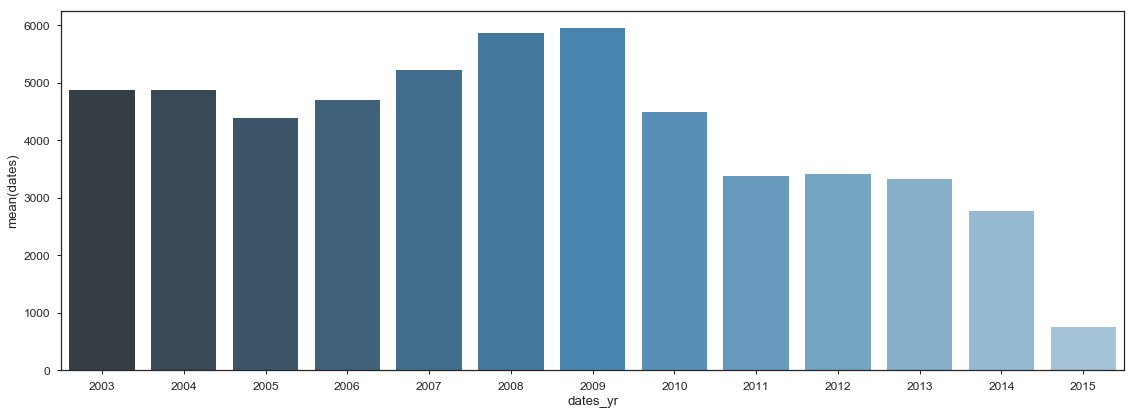

-----------------------------------------
Category type is: 
DRUNKENNESS
-----------------------------------------


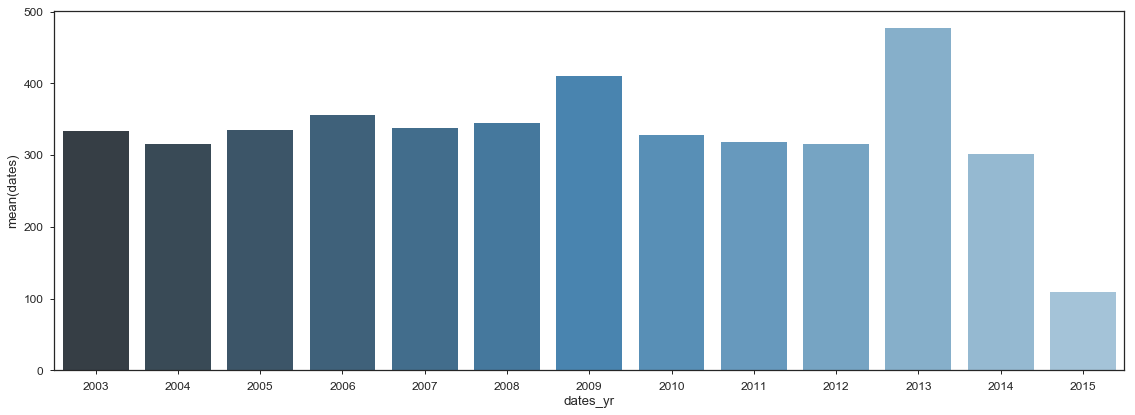

-----------------------------------------
Category type is: 
STOLEN PROPERTY
-----------------------------------------


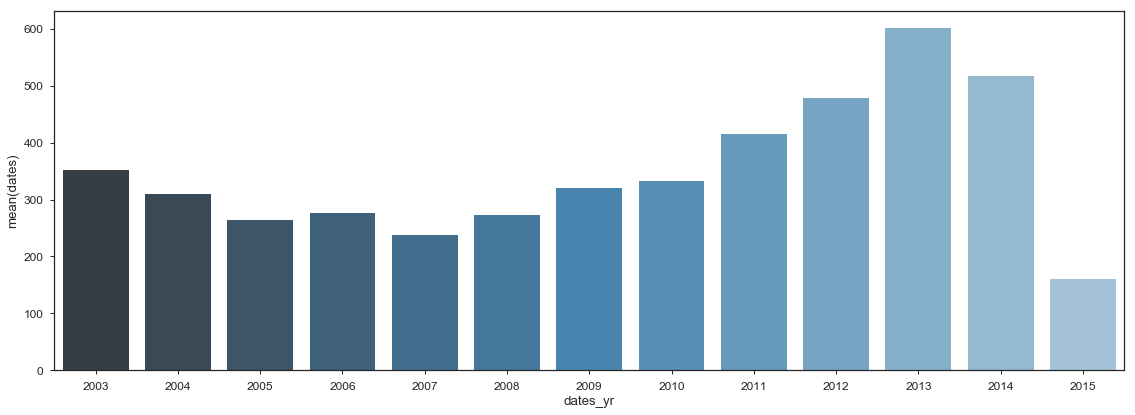

-----------------------------------------
Category type is: 
FRAUD
-----------------------------------------


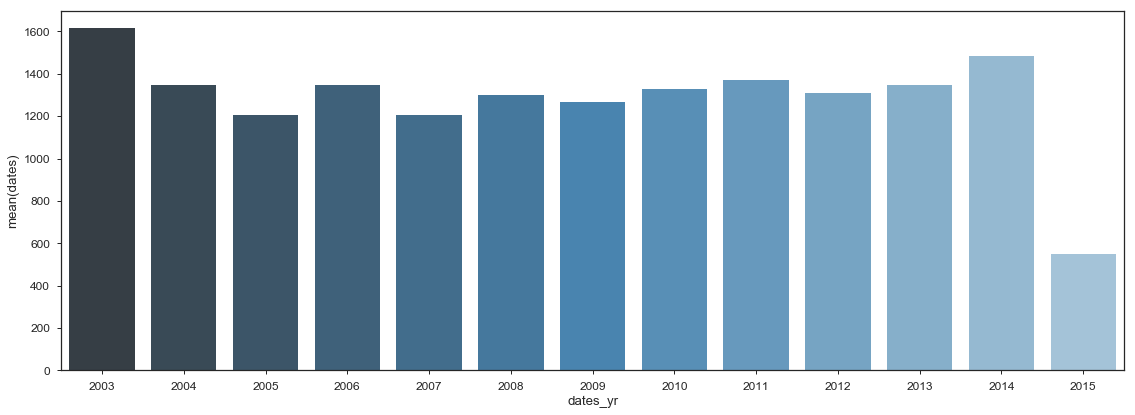

-----------------------------------------
Category type is: 
PORNOGRAPHY/OBSCENE MAT
-----------------------------------------


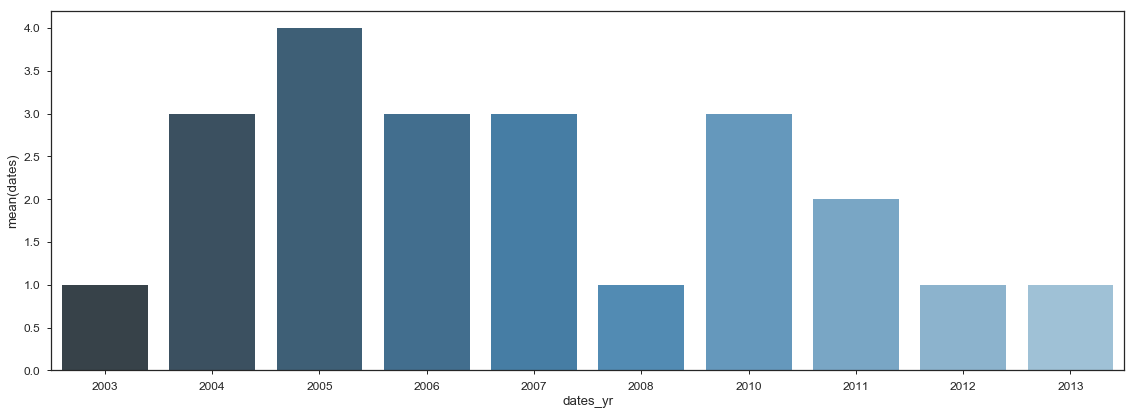

-----------------------------------------
Category type is: 
SUSPICIOUS OCC
-----------------------------------------


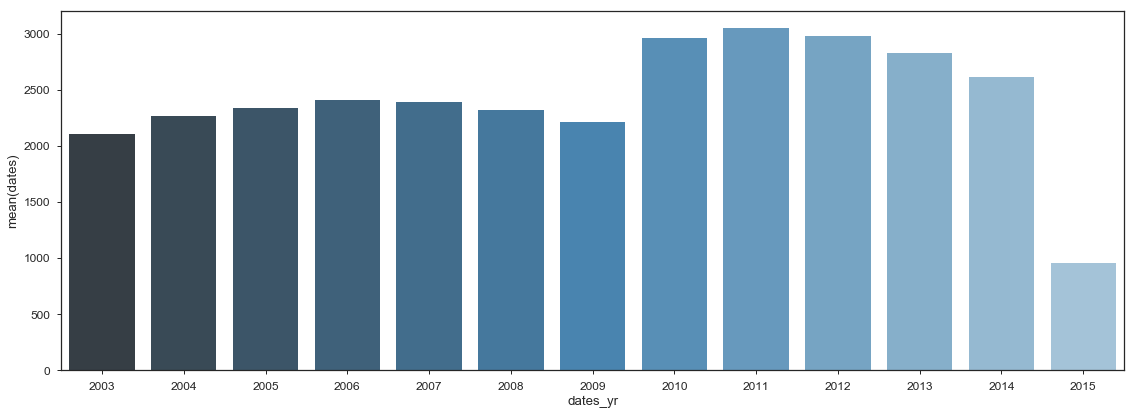

-----------------------------------------
Category type is: 
ASSAULT
-----------------------------------------


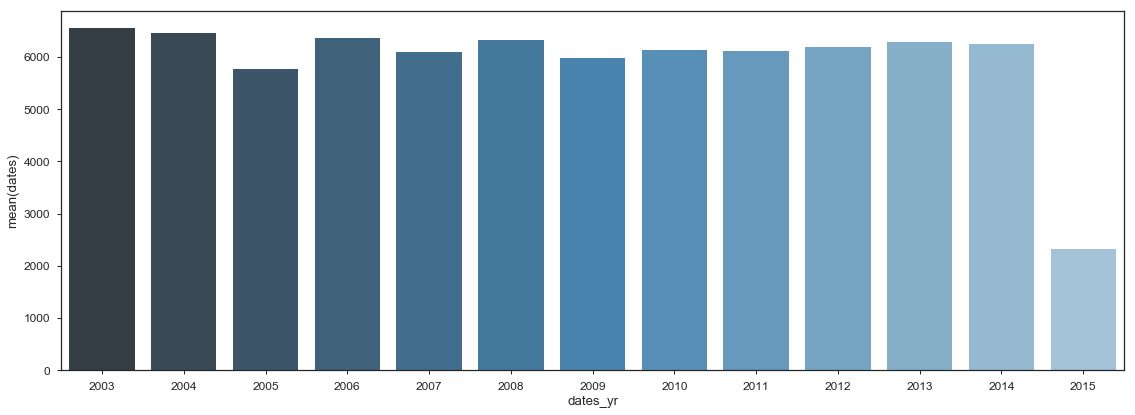

-----------------------------------------
Category type is: 
RECOVERED VEHICLE
-----------------------------------------


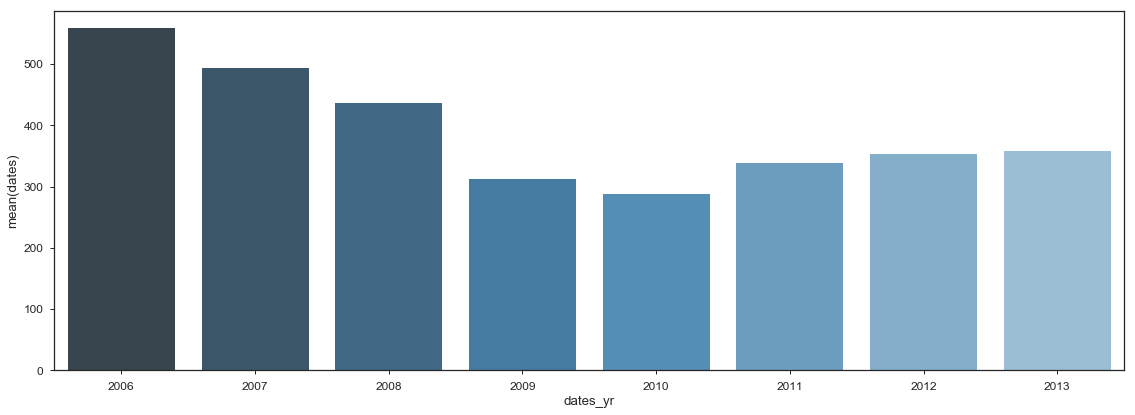

-----------------------------------------
Category type is: 
LOITERING
-----------------------------------------


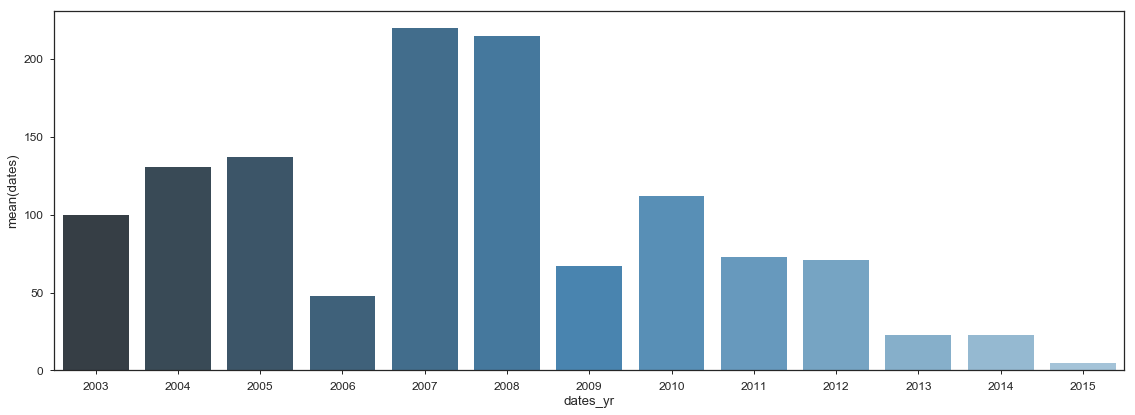

-----------------------------------------
Category type is: 
BURGLARY
-----------------------------------------


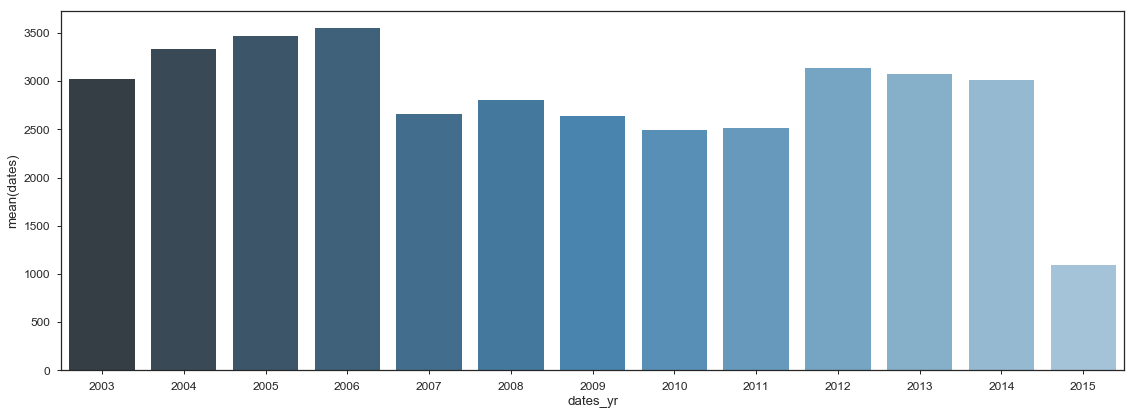

-----------------------------------------
Category type is: 
SECONDARY CODES
-----------------------------------------


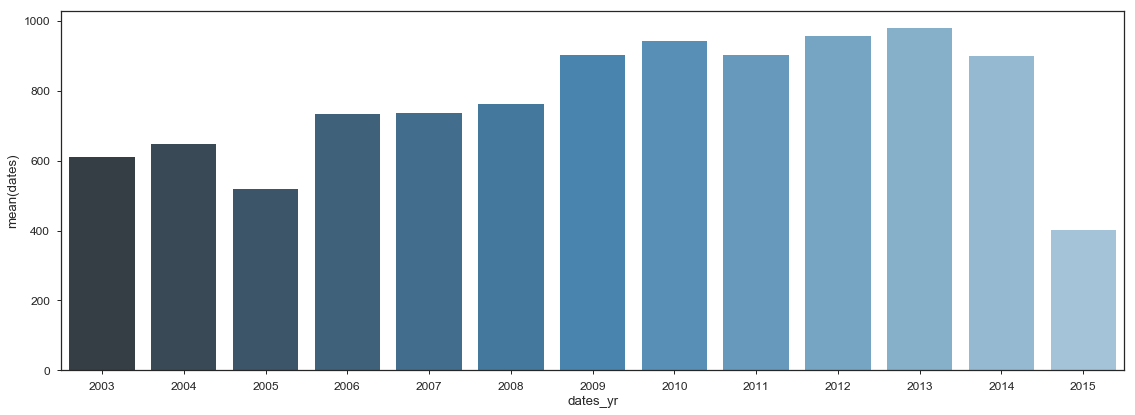

-----------------------------------------
Category type is: 
LARCENY/THEFT
-----------------------------------------


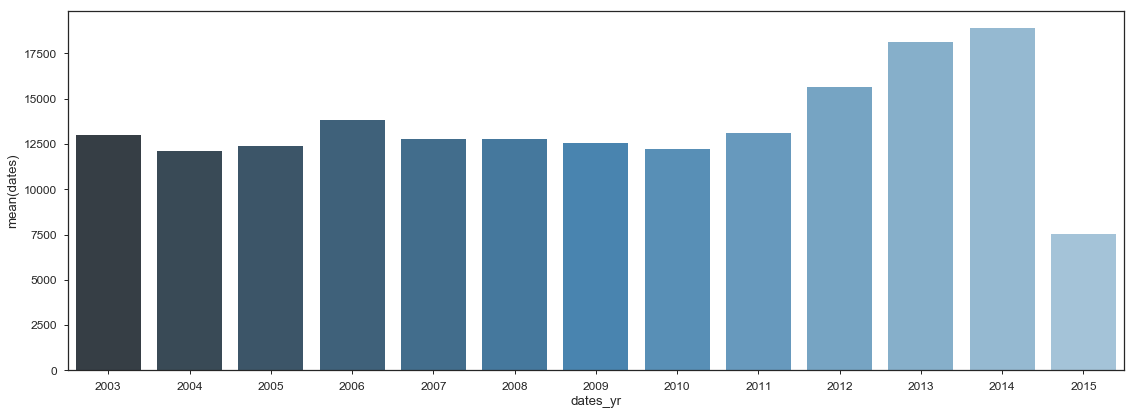

-----------------------------------------
Category type is: 
WARRANTS
-----------------------------------------


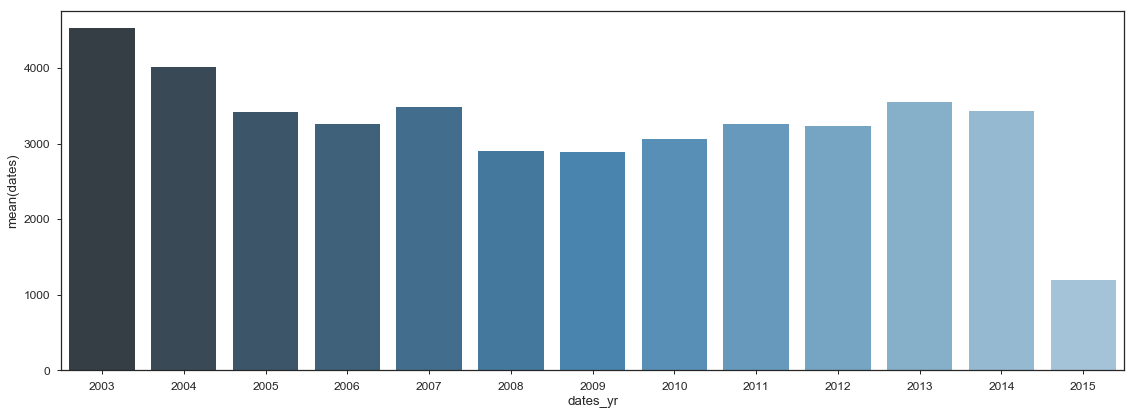

-----------------------------------------
Category type is: 
EXTORTION
-----------------------------------------


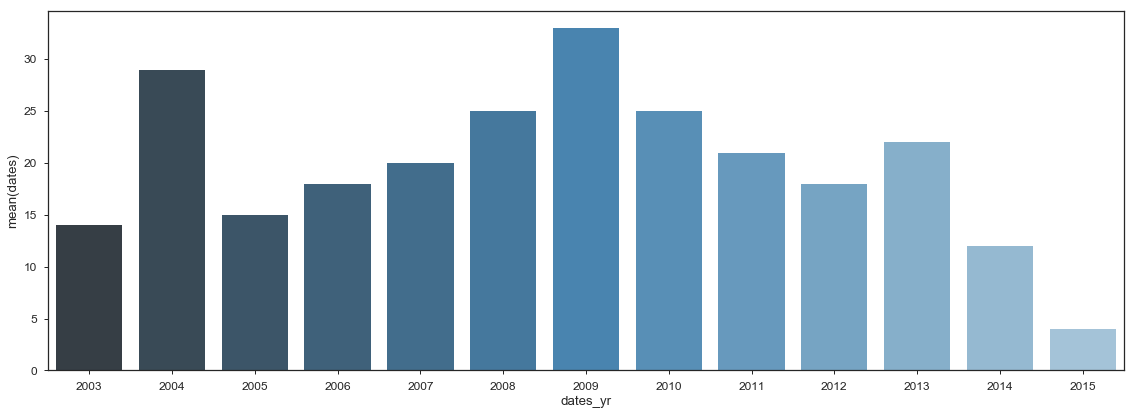

-----------------------------------------
Category type is: 
KIDNAPPING
-----------------------------------------


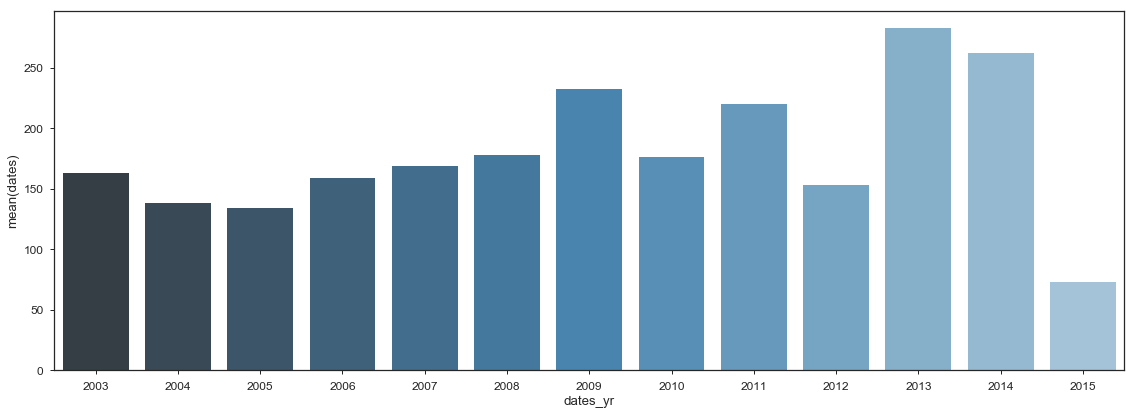

-----------------------------------------
Category type is: 
BRIBERY
-----------------------------------------


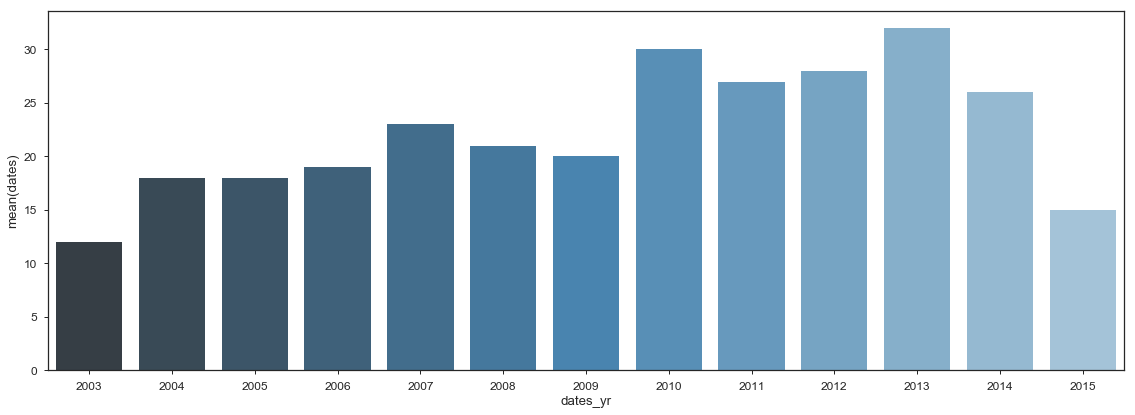

-----------------------------------------
Category type is: 
DRIVING UNDER THE INFLUENCE
-----------------------------------------


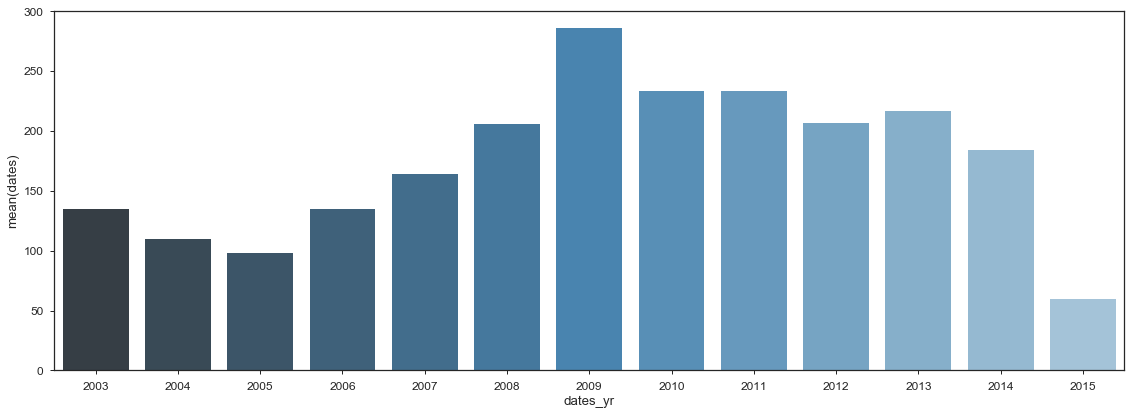

-----------------------------------------
Category type is: 
LIQUOR LAWS
-----------------------------------------


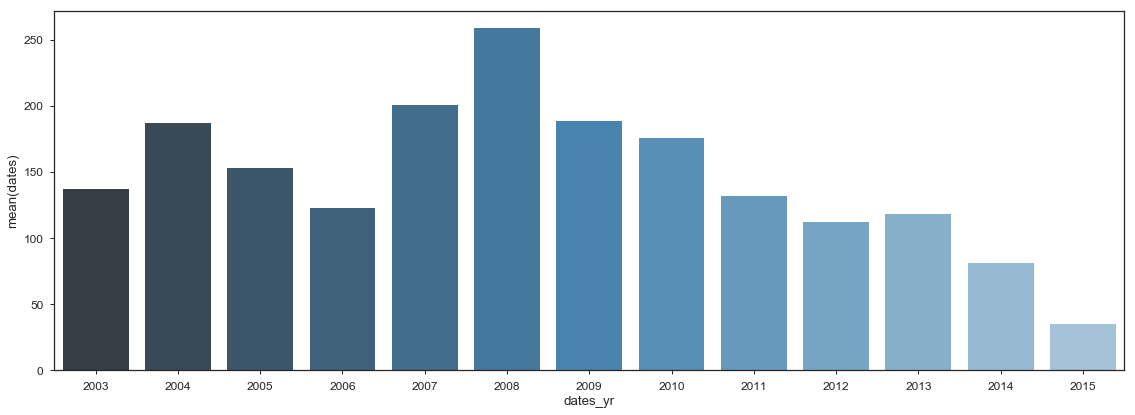

-----------------------------------------
Category type is: 
BAD CHECKS
-----------------------------------------


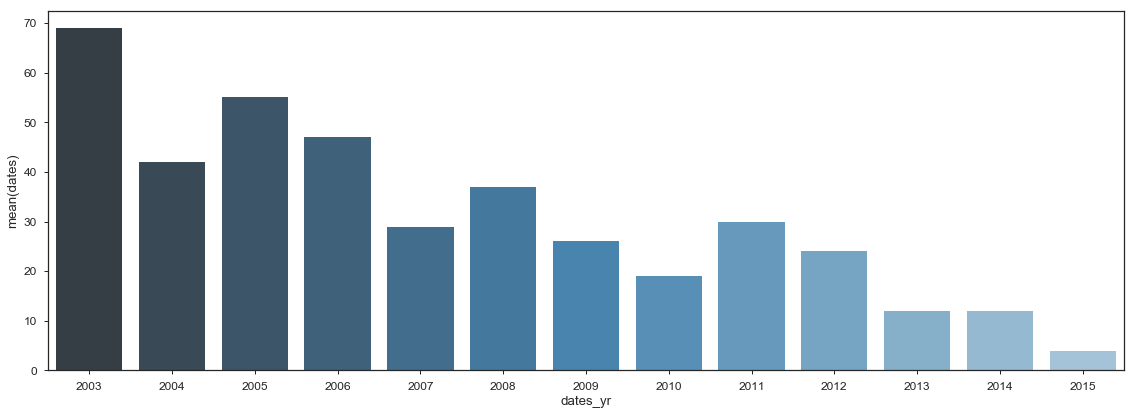

-----------------------------------------
Category type is: 
TREA
-----------------------------------------


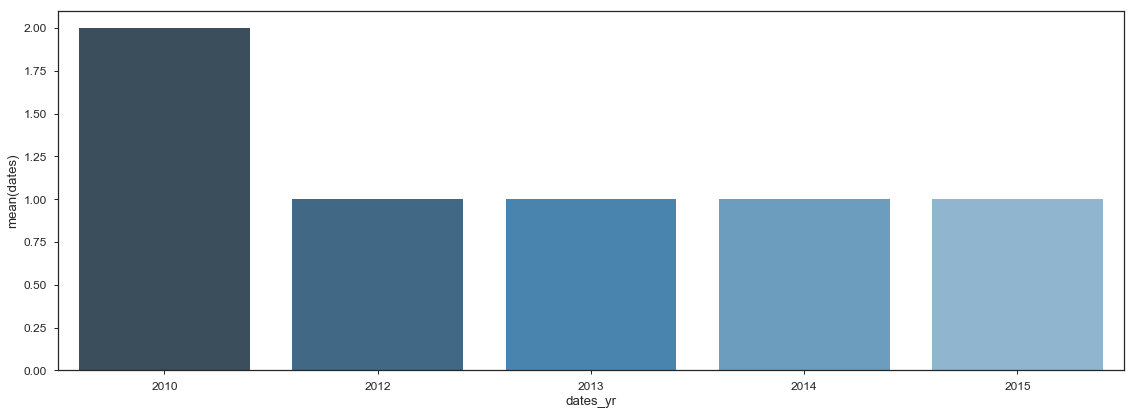

-----------------------------------------
Category type is: 
ROBBERY
-----------------------------------------


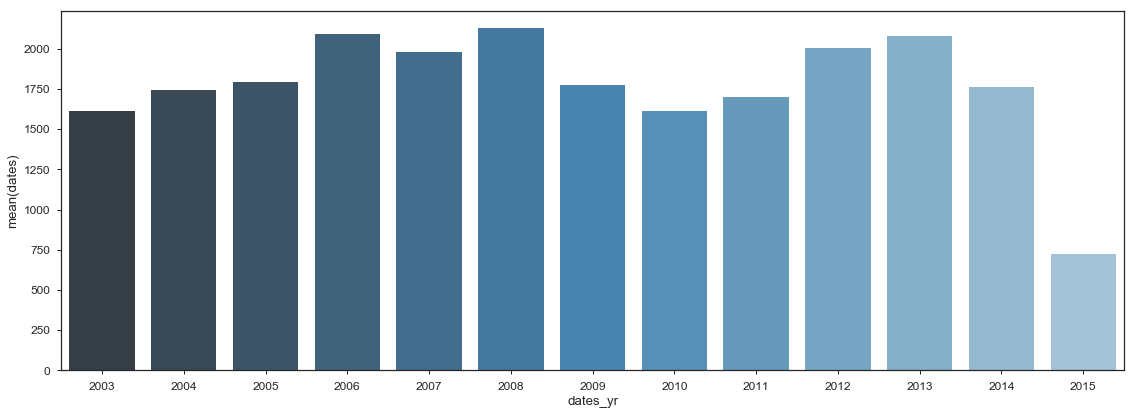

-----------------------------------------
Category type is: 
RUNAWAY
-----------------------------------------


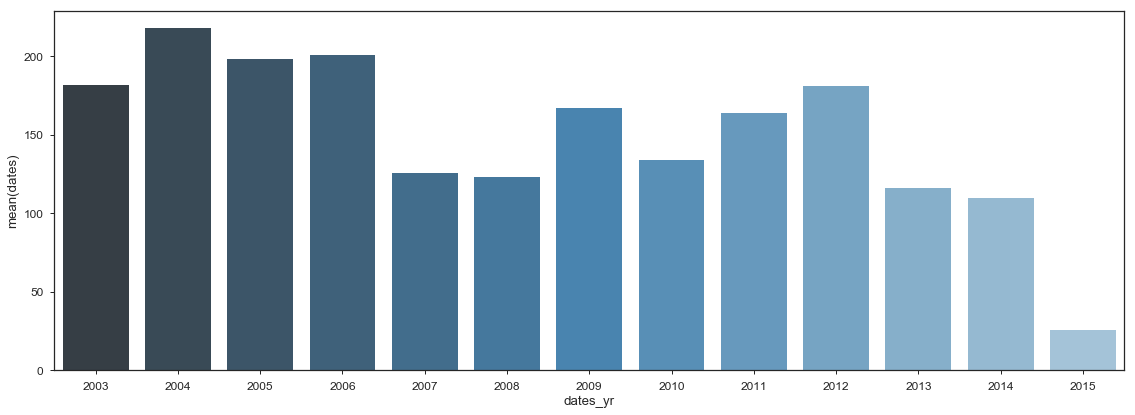

In [39]:
list_hld_cat = list(set(df_sf_crime2.category.values))


# Loop over  grps
for idx_time_cat, df_col in enumerate(list_hld_cat):
    
    # Object to hold plotss
    fig, ax = plt.subplots(nrows = 1
                          ,ncols = 1
                          ,figsize = (16, 6)

                          )


    print ("-----------------------------------------")
    print ("Category type is: \n{}".format(df_col))
    print ("-----------------------------------------")
    
    # In-data§
    _tmp_grp = df_sf_crime2[df_sf_crime2['category'] == df_col][['dates', 'dates_yr']].groupby(['dates_yr'], as_index = False).count()
    
    # Plot object
    plot_out = sns.barplot(_tmp_grp['dates_yr']
                            ,_tmp_grp['dates']
                           ,palette = 'Blues_d'
                           ,ax = ax
                          )


    
#     ax[idx_time_cat].set_xticklabels(ax[idx_time_cat].get_xticklabels(), rotation=45)    
    
    
#     ax[idx_time_cat].set_xlabel(df_col,fontsize=18, rotation=0)
#     ax[idx_time_cat].set_ylabel('',fontsize=18, rotation=0)    


    # Make sure we get space betweens plots
    fig.tight_layout()


    plt.show()

-----------------------------------------
Category type is: 
NOT PROSECUTED
-----------------------------------------


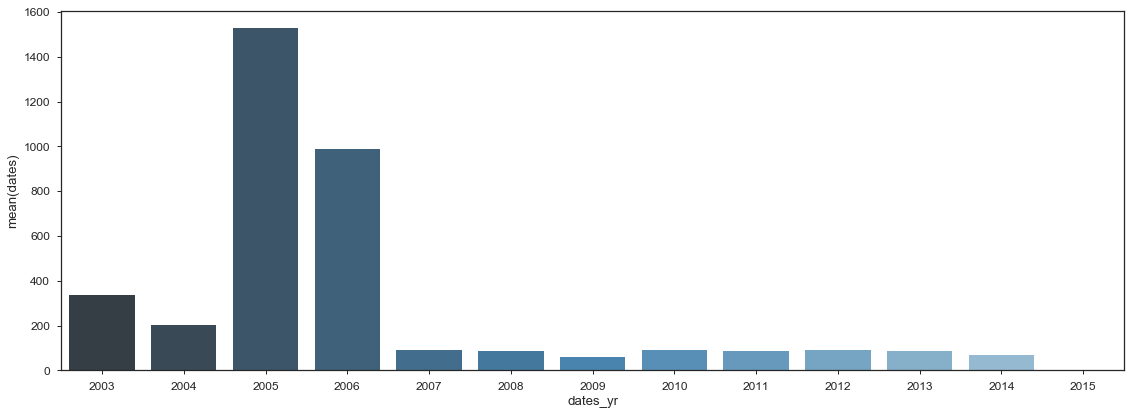

-----------------------------------------
Category type is: 
ARREST, CITED
-----------------------------------------


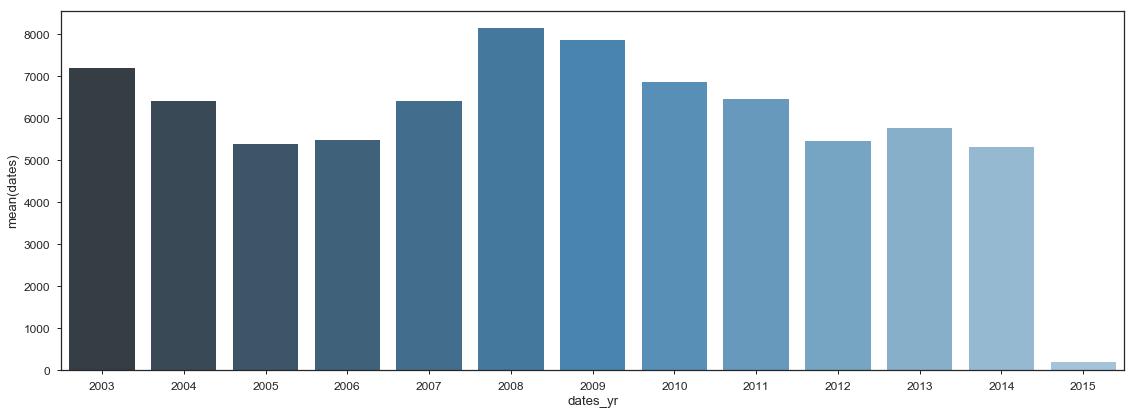

-----------------------------------------
Category type is: 
COMPLAINANT REFUSES TO PROSECUTE
-----------------------------------------


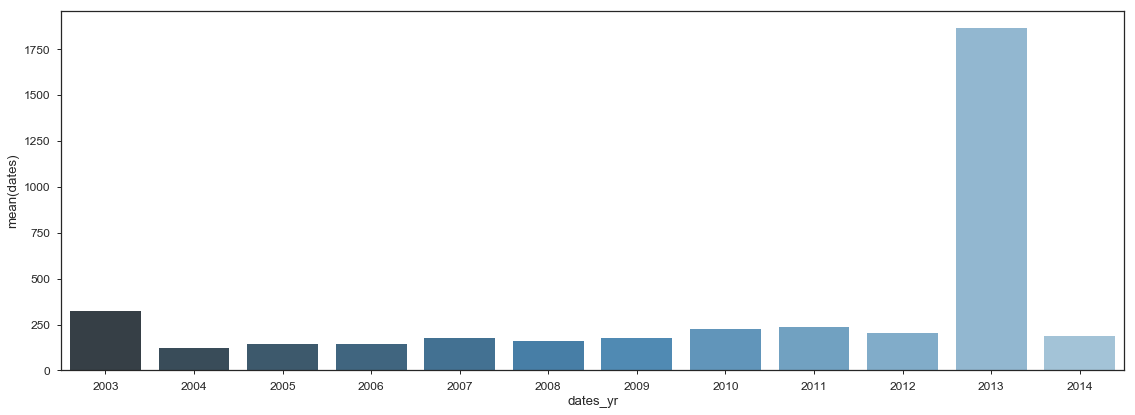

-----------------------------------------
Category type is: 
EXCEPTIONAL CLEARANCE
-----------------------------------------


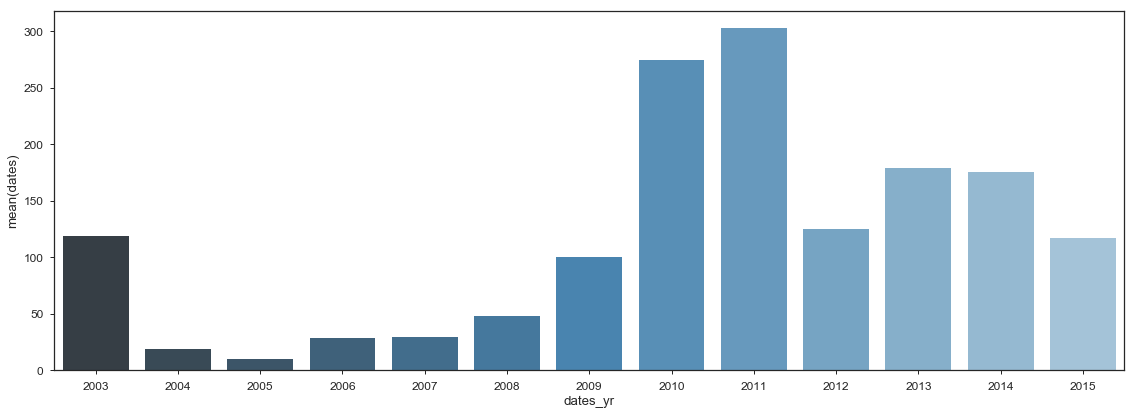

-----------------------------------------
Category type is: 
JUVENILE DIVERTED
-----------------------------------------


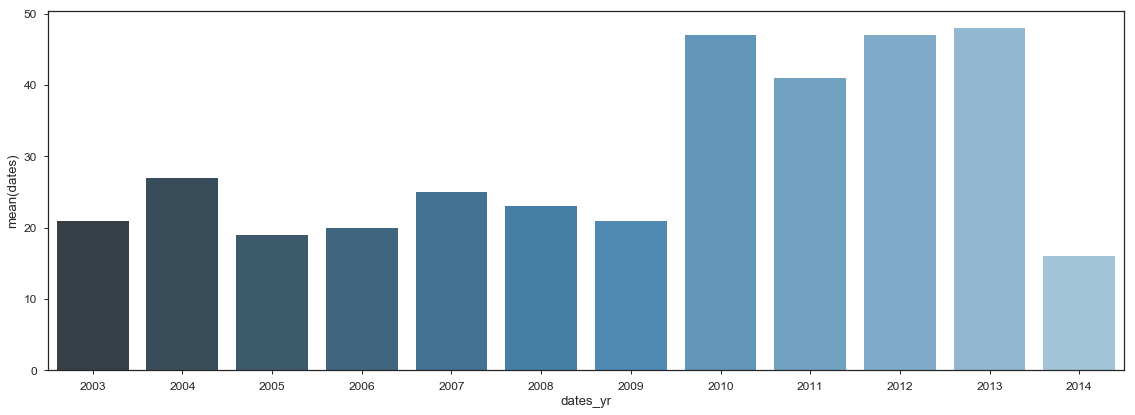

-----------------------------------------
Category type is: 
LOCATED
-----------------------------------------


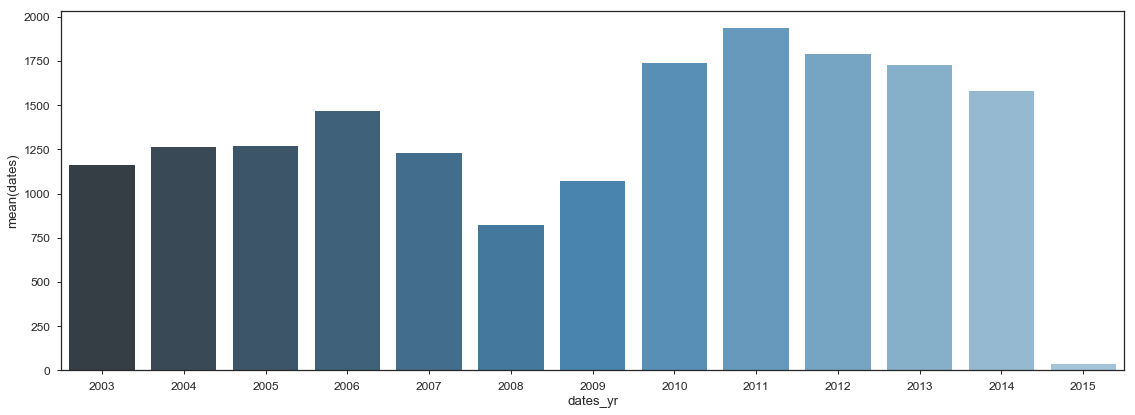

-----------------------------------------
Category type is: 
PROSECUTED BY OUTSIDE AGENCY
-----------------------------------------


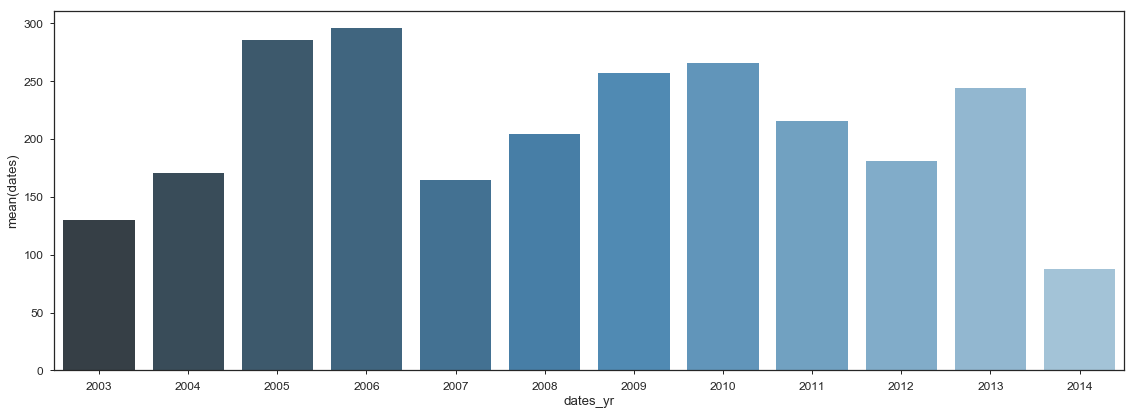

-----------------------------------------
Category type is: 
ARREST, BOOKED
-----------------------------------------


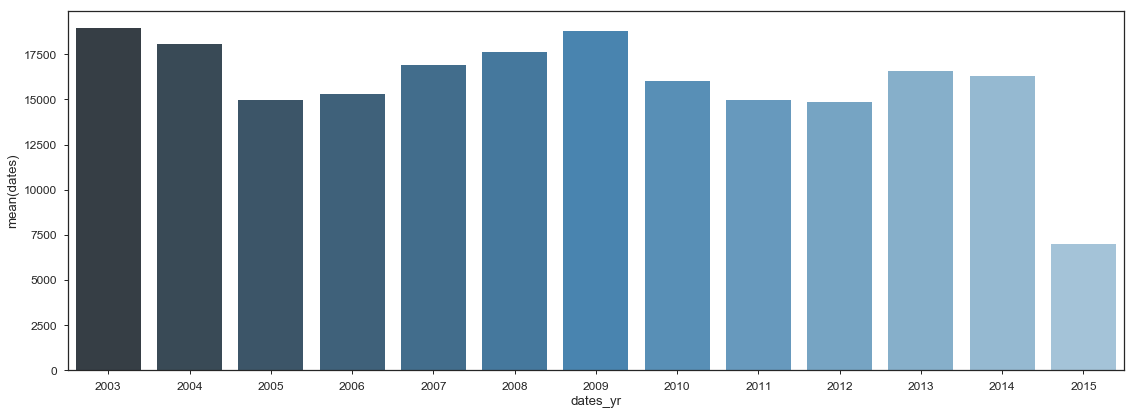

-----------------------------------------
Category type is: 
UNFOUNDED
-----------------------------------------


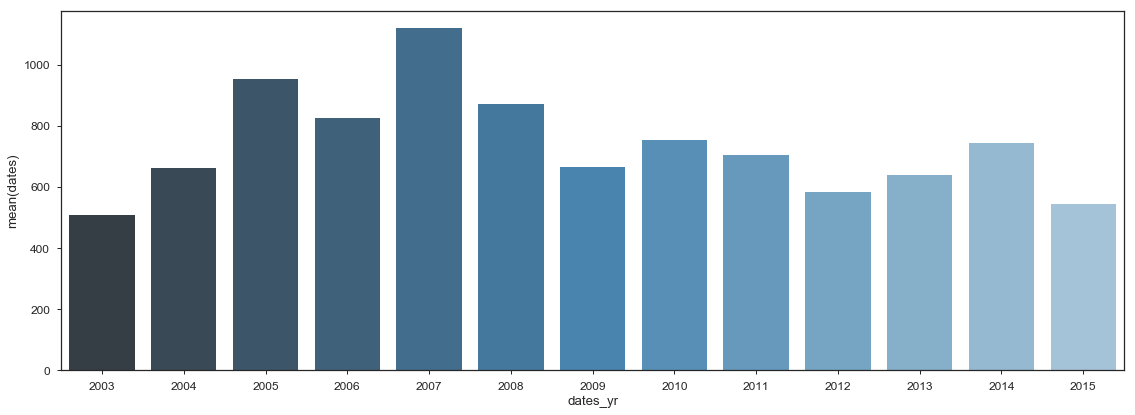

-----------------------------------------
Category type is: 
JUVENILE BOOKED
-----------------------------------------


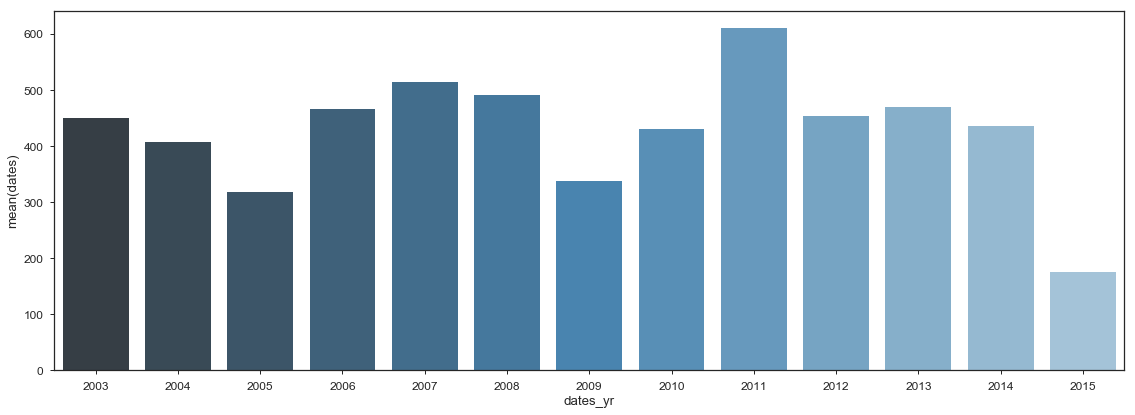

-----------------------------------------
Category type is: 
CLEARED-CONTACT JUVENILE FOR MORE INFO
-----------------------------------------


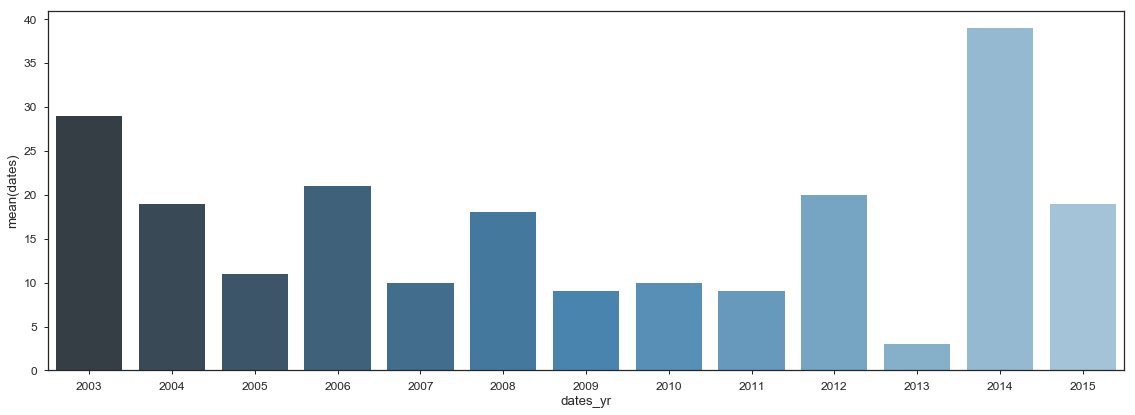

-----------------------------------------
Category type is: 
PSYCHOPATHIC CASE
-----------------------------------------


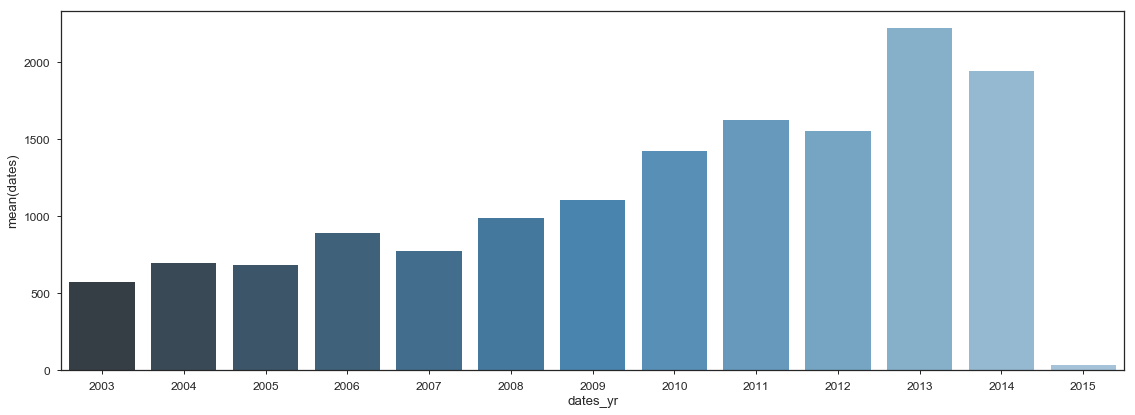

-----------------------------------------
Category type is: 
PROSECUTED FOR LESSER OFFENSE
-----------------------------------------


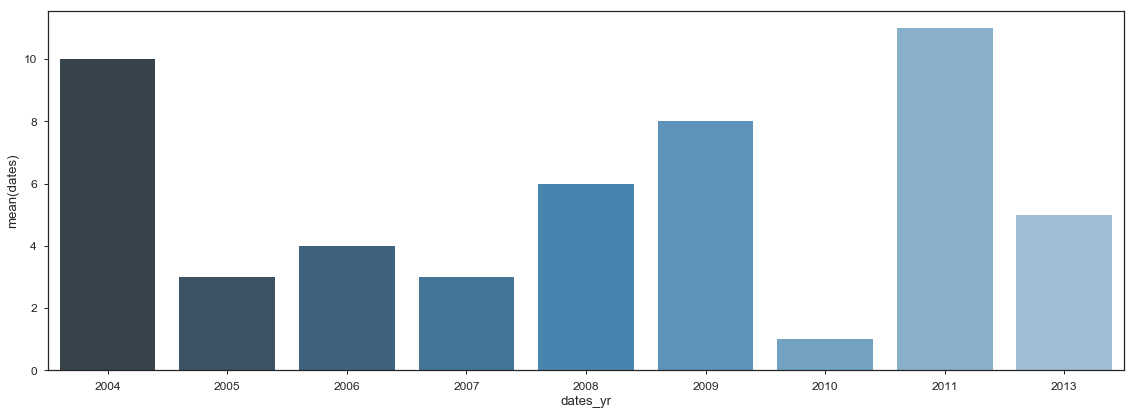

-----------------------------------------
Category type is: 
JUVENILE CITED
-----------------------------------------


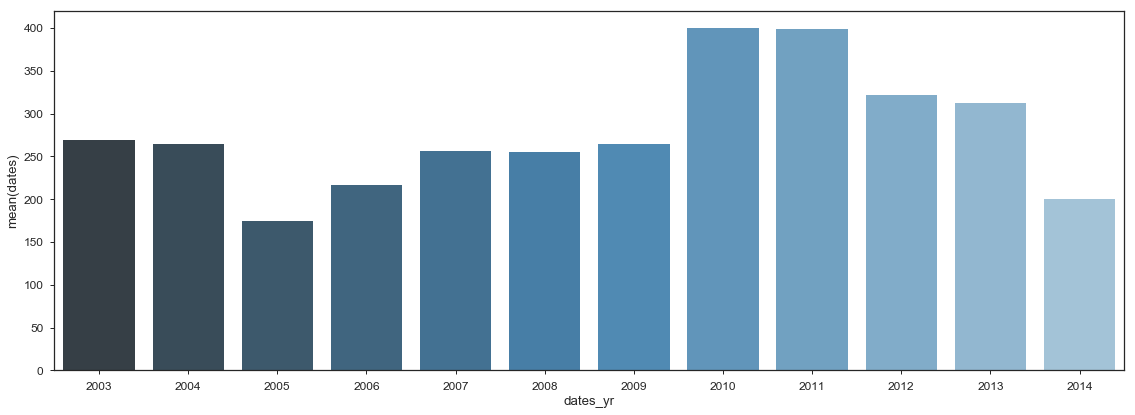

-----------------------------------------
Category type is: 
DISTRICT ATTORNEY REFUSES TO PROSECUTE
-----------------------------------------


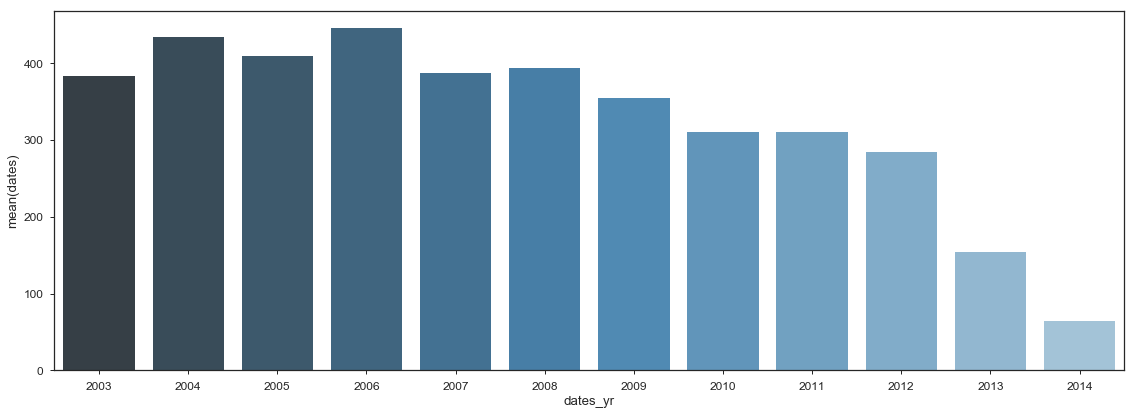

-----------------------------------------
Category type is: 
JUVENILE ADMONISHED
-----------------------------------------


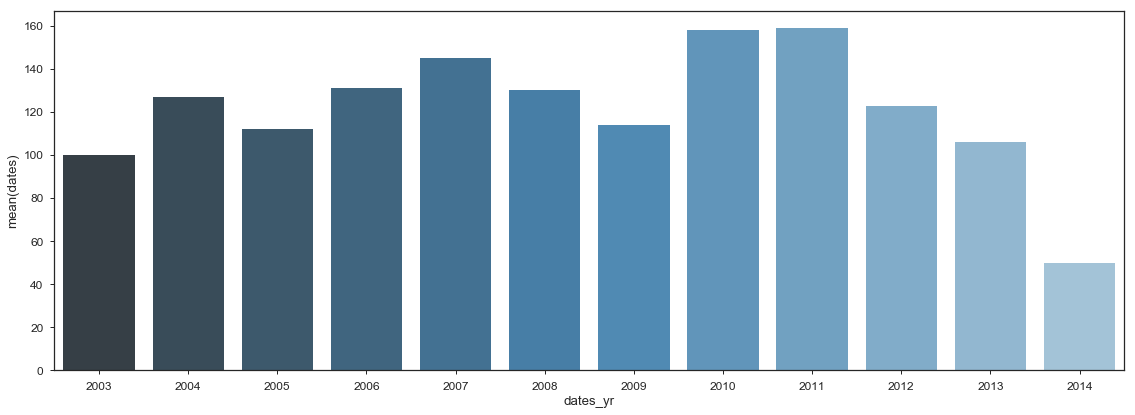

-----------------------------------------
Category type is: 
Missing
-----------------------------------------


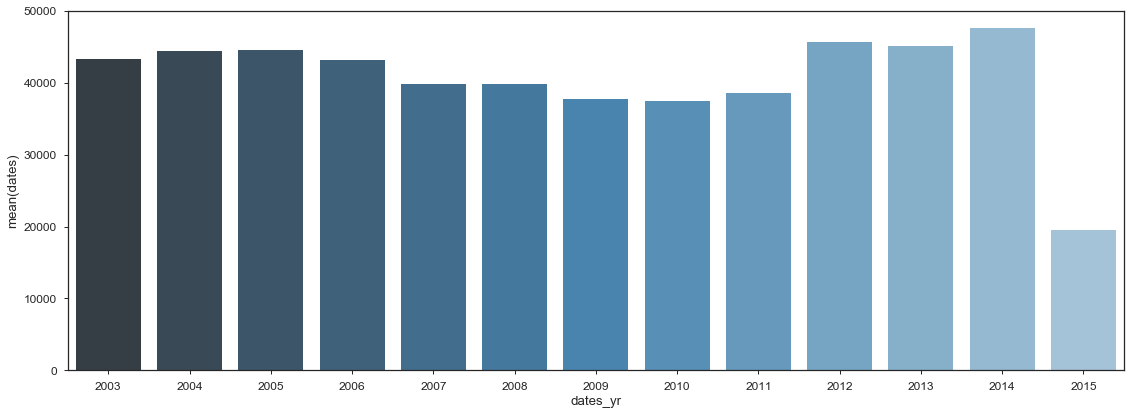

In [40]:
list_hld_cat = list(set(df_sf_crime2.resolution.values))


# Loop over  grps
for idx_time_cat, df_col in enumerate(list_hld_cat):
    
    # Object to hold plotss
    fig, ax = plt.subplots(nrows = 1
                          ,ncols = 1
                          ,figsize = (16, 6)

                          )


    print ("-----------------------------------------")
    print ("Category type is: \n{}".format(df_col))
    print ("-----------------------------------------")
    
    # In-data§
    _tmp_grp = df_sf_crime2[df_sf_crime2['resolution'] == df_col][['dates', 'dates_yr']].groupby(['dates_yr'], as_index = False).count()
    
    # Plot object
    plot_out = sns.barplot(_tmp_grp['dates_yr']
                            ,_tmp_grp['dates']
                           ,palette = 'Blues_d'
                           ,ax = ax
                          )


    
#     ax[idx_time_cat].set_xticklabels(ax[idx_time_cat].get_xticklabels(), rotation=45)    
    
    
#     ax[idx_time_cat].set_xlabel(df_col,fontsize=18, rotation=0)
#     ax[idx_time_cat].set_ylabel('',fontsize=18, rotation=0)    


    # Make sure we get space betweens plots
    fig.tight_layout()


    plt.show()

### Export to aggregation class and excel pivot

In [41]:
df_count_cat_col

column  count
0           f_outl_y      2
1           f_outl_x      2
2     f_not_resolved      2
3     grp_resolv_hml      3
4          dates_qtr      4
5   grp_geo_zone_hml      4
6     grp_dates_hour      5
7       dates_day_wk      7
8          dayofweek      7
9         grp_x_sign      9
10        pddistrict     10
11             grp_y     11
12         dates_mth     12
13          dates_yr     13
14        resolution     17
15        dates_hour     24
16          category     39
17          descript    879
18           address  23228

In [42]:
print ("Latest update of data is: {}".format(f_dt_now()))

list_col_grp = [col for col in set(df_count_cat_col.column.values) if col not in (['address', 'descript'])]
list_col_sum = None
list_col_cnt = ['dates']

# Aggregate it
class_data_agg = cstr.c_atlas(df_sf_crime2[list_col_grp + list_col_cnt])

agg_common_channel = class_data_agg.aggregate(list_col_grp
                                             ,False
                                             ,list_col_cnt
                                             ,False
                                             ,False
                                             
                                             ,True
                                             ,"C:\\Anaconda3\\Data\\kaggle\\sf_crime\\"
                                             ,'agg_crime.csv'
                                             ,True)

print ("Latest update of data is: {}".format(f_dt_now()))

Latest update of data is: 2018-04-18 18:29:30
Latest update of data is: 2018-04-18 18:29:45
